# **Machine Learning Practice Project: SuperKart**

--------------------
## **Context:**
--------------------

A sales forecast is a prediction of future sales revenue based on historical data, industry trends, and the status of the current sales pipeline. Businesses use the sales forecast to estimate weekly, monthly, quarterly, and annual sales totals. It is extremely important for a company to make an accurate sales forecast as it adds value across an organization and helps the different verticals to chalk out their future course of action. Forecasting helps an organization plan its sales operations by region and provides valuable insights to the supply chain team regarding the procurement of goods and materials. 
An accurate sales forecast process has many benefits which include improved decision-making about the future and reduction of sales pipeline and forecast risks. Moreover, it helps to reduce the time spent in planning territory coverage and establish benchmarks that can be used to assess trends in the future.

---------------------------
## **Objective:**
----------------------------

SuperKart is an organization that owns a chain of supermarkets and food marts providing a wide range of products. They want to predict the future sales revenue of its different outlets so that they can strategize their sales operation across different tier cities and plan their inventory accordingly. To achieve this purpose, SuperKart has hired a data science firm, shared the sales records of its various outlets for the previous quarter, and asked the firm to come up with a suitable model to predict the total sales of the stores for the upcoming quarter.

---------------------------------
## **Data Description:**
---------------------------------

The data contains the different attributes of the various products and stores. The detailed data dictionary is given below.

* Product_Id - unique identifier of each product, each identifier having two letters at the beginning followed by a number.
* Product_Weight - the weight of each product
* Product_Sugar_Content - sugar content of each product like low sugar, regular, and no sugar
* Product_Allocated_Area - the ratio of the allocated display area of each product to the total display area of all the products in a store
* Product_Type - broad category for each product like meat, snack foods, hard drinks, dairy, canned, soft drinks, health and hygiene, baking goods, bread, breakfast, frozen foods, fruits and vegetables, household, seafood, starchy foods, others
* Product_MRP - maximum retail price of each product
* Store_Id - unique identifier of each store
* Store_Establishment_Year - the year in which the store was established
* Store_Size - the size of the store depending on sq. feet like high, medium, and low
* Store_Location_City_Type - the type of city in which the store is located like Tier 1, Tier 2, and Tier 3. Tier 1 consists of cities where the standard of living is comparatively higher than its Tier 2 and Tier 3 counterparts.
* Store_Type - the type of store depending on the products that are being sold there like Departmental Store, Supermarket Type 1, Supermarket Type 2, and Food Mart
* Product_Store_Sales_Total - total revenue generated by the sale of that particular product in that particular store


## **Importing the necessary libraries and overview of the dataset**

In [94]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)

# Import libraries for building linear regression model
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# Import library for preparing data
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

### **Importing the Dataset**

In [95]:
kart = pd.read_csv("Superkart.csv")

In [96]:
# Copying data to another variable to avoid any changes to original data
data = kart.copy()

### **View the first and last 5 rows of the dataset**

In [97]:
# Check the head of the data
data.head()

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total
0,FD6114,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40
1,FD7839,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02
2,FD5075,14.28,Regular,0.031,Canned,162.08,OUT001,1987,High,Tier 2,Supermarket Type1,4130.16
3,FD8233,12.10,Low Sugar,0.112,Baking Goods,186.31,OUT001,1987,High,Tier 2,Supermarket Type1,4132.18
4,NC1180,9.57,No Sugar,0.010,Health and Hygiene,123.67,OUT002,1998,Small,Tier 3,Food Mart,2279.36


In [98]:
# Check the tail of the data
data.tail()

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total
8758,NC7546,14.80,No Sugar,0.016,Health and Hygiene,140.53,OUT004,2009,Medium,Tier 2,Supermarket Type2,3806.53
8759,NC584,14.06,No Sugar,0.142,Household,144.51,OUT004,2009,Medium,Tier 2,Supermarket Type2,5020.74
8760,NC2471,13.48,No Sugar,0.017,Health and Hygiene,88.58,OUT001,1987,High,Tier 2,Supermarket Type1,2443.42
8761,NC7187,13.89,No Sugar,0.193,Household,168.44,OUT001,1987,High,Tier 2,Supermarket Type1,4171.82
8762,FD306,14.73,Low Sugar,0.177,Snack Foods,224.93,OUT002,1998,Small,Tier 3,Food Mart,2186.08


### **Understand the shape of the dataset**

In [99]:
# Check the shape of the data
data.shape

(8763, 12)

### **Check the data types of the columns for the dataset**

In [100]:
# Check for information of the data
data.info()

print('\nNumeric colums\n',data.select_dtypes(exclude='object').columns)

print('\nNon-Numeric colums\n',data.select_dtypes(include='object').columns)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Product_Id                 8763 non-null   object 
 1   Product_Weight             8763 non-null   float64
 2   Product_Sugar_Content      8763 non-null   object 
 3   Product_Allocated_Area     8763 non-null   float64
 4   Product_Type               8763 non-null   object 
 5   Product_MRP                8763 non-null   float64
 6   Store_Id                   8763 non-null   object 
 7   Store_Establishment_Year   8763 non-null   int64  
 8   Store_Size                 8763 non-null   object 
 9   Store_Location_City_Type   8763 non-null   object 
 10  Store_Type                 8763 non-null   object 
 11  Product_Store_Sales_Total  8763 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 821.7+ KB

Numeric colums
 Index(['Product_Weight', 'Pr

**Observations:**
- **Numeric columns**

'Product_Weight', 'Product_Allocated_Area', 'Product_MRP',
       'Store_Establishment_Year', 'Product_Store_Sales_Total'
       
- **Non-numeric columns**

'Product_Id', 'Product_Sugar_Content', 'Product_Type', 'Store_Id',
       'Store_Size', 'Store_Location_City_Type', 'Store_Type'

### **Checking for missing values in the dataset** ###

In [101]:
# Check for missing values in the data
data.isnull().sum()

Product_Id                   0
Product_Weight               0
Product_Sugar_Content        0
Product_Allocated_Area       0
Product_Type                 0
Product_MRP                  0
Store_Id                     0
Store_Establishment_Year     0
Store_Size                   0
Store_Location_City_Type     0
Store_Type                   0
Product_Store_Sales_Total    0
dtype: int64

**Observations:**
- Data is good no null values are found.

In [102]:
# Check for duplicate values
data.duplicated().value_counts()

False    8763
dtype: int64

**Observations:**
- Data is good no duplicate values are found.

## **Exploratory Data Analysis**

#### Let's check the statistical summary of the data

In [103]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Product_Weight,8763.0,12.653792,2.217320,4.000,11.150,12.660,14.180,22.000
Product_Allocated_Area,8763.0,0.068786,0.048204,0.004,0.031,0.056,0.096,0.298
Product_MRP,8763.0,147.032539,30.694110,31.000,126.160,146.740,167.585,266.000
Store_Establishment_Year,8763.0,2002.032751,8.388381,1987.000,1998.000,2009.000,2009.000,2009.000
Product_Store_Sales_Total,8763.0,3464.003640,1065.630494,33.000,2761.715,3452.340,4145.165,8000.000


**Observations:**
- Product weight is distrubuted between 4-22 units, with mean and median pretty close to each other at 12.65 and std deviation of 2.13 indicating not too many outliers.
- Product allocated area is distributed between 0.004 to 0.298, with mean higher than the median indicating that there might be outliers on higher side. Also huge difference between 75% percentile(0.096) to max(0.298) proves that theory of outliers on higher side.
- Product MRP is distrubuted between 31-266 units, mean is slightly higher that median indicating very few outliers on higher side
- All stores are established sometime between 1987 to 2009. With Median, 75% & max at 2009 looks like at list half the stores were opened in 2009. Mean is lower at 2002 indicating there might be outliers on lower end for stores establised in 1980s
- Sales total for the product is distributed between 33-8000 with mean slightly higher than median indicating few outliers on high side. Huge difference between 75% and max suports that theory.


#### Let's check the count of each unique category in each of the categorical variables

In [104]:
# Making a list of all categorical variables
cat_col = list(data.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 50)

FD6114    1
FD8349    1
DR3530    1
NC5926    1
FD3575    1
         ..
FD2396    1
FD681     1
FD8077    1
DR3118    1
FD306     1
Name: Product_Id, Length: 8763, dtype: int64
--------------------------------------------------
Low Sugar    4885
Regular      2251
No Sugar     1519
reg           108
Name: Product_Sugar_Content, dtype: int64
--------------------------------------------------
Fruits and Vegetables    1249
Snack Foods              1149
Frozen Foods              811
Dairy                     796
Household                 740
Baking Goods              716
Canned                    677
Health and Hygiene        628
Meat                      618
Soft Drinks               519
Breads                    200
Hard Drinks               186
Others                    151
Starchy Foods             141
Breakfast                 106
Seafood                    76
Name: Product_Type, dtype: int64
--------------------------------------------------
OUT004    4676
OUT001    1586
OUT003    134

**Observations:**
- Product Id is unque identifier for each product and can be dropped from the anlysis
- Product_Sugar_Content is showing 4 categories in data but 'Regular' and 'reg' can be merged, leaving 3 unique classes 'Regular', 'Low Sugar', 'No Sugar'
- Product_Type has many distinct categories with many products in 'Fruits and Vegetables' and 'Snack Foods' category
- Store_Id indicates that we have data from only 4 stores
- Store_Size indicatess tha the stores can be Small, Mediium or High sized.
- Store_Location_City_Type has 3 classes Tier 1, Tier 2 and Tier 3
- Store_Type - there are 4 store types. Looks like each of the 4 stores are of different type here. 

In [105]:
# Replacing reg category with Regular in Product_Sugar_Content feature

data['Product_Sugar_Content'].replace(to_replace = ["reg"], value = ["Regular"], inplace = True)

In [106]:
# Print the value counts for each class in Product_Sugar_Content feature
data['Product_Sugar_Content'].value_counts()

Low Sugar    4885
Regular      2359
No Sugar     1519
Name: Product_Sugar_Content, dtype: int64

**Observation:**
- Product_Sugar_Content can be categoried in three classes, Low Sugar, Regular and No Sugar. 
- More than half products are in Low Sugar category


In [107]:
# Extracting the first two characters from the Product_Id column and storing it in another column
data["Product_Id_char"] = data["Product_Id"].str[:2]

data.head()

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total,Product_Id_char
0,FD6114,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40,FD
1,FD7839,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02,FD
2,FD5075,14.28,Regular,0.031,Canned,162.08,OUT001,1987,High,Tier 2,Supermarket Type1,4130.16,FD
3,FD8233,12.10,Low Sugar,0.112,Baking Goods,186.31,OUT001,1987,High,Tier 2,Supermarket Type1,4132.18,FD
4,NC1180,9.57,No Sugar,0.010,Health and Hygiene,123.67,OUT002,1998,Small,Tier 3,Food Mart,2279.36,NC


In [108]:
data["Product_Id_char"].value_counts() # Fill the blank to get all unique elements in Product_Id_char

FD    6539
NC    1519
DR     705
Name: Product_Id_char, dtype: int64

In [109]:
data.loc[data.Product_Id_char == "FD", "Product_Type"].value_counts() # Fill the blank to get all unique elements

Fruits and Vegetables    1249
Snack Foods              1149
Frozen Foods              811
Dairy                     796
Baking Goods              716
Canned                    677
Meat                      618
Breads                    200
Starchy Foods             141
Breakfast                 106
Seafood                    76
Name: Product_Type, dtype: int64

In [110]:
data.loc[data.Product_Id_char == "DR", "Product_Type"].value_counts() # Fill the blank to get all unique elements

Soft Drinks    519
Hard Drinks    186
Name: Product_Type, dtype: int64

In [111]:
data.loc[data.Product_Id_char == "NC", "Product_Type"].value_counts() # Fill the blank to get all unique elements

Household             740
Health and Hygiene    628
Others                151
Name: Product_Type, dtype: int64

#### The Product_Id column will not add any value to our analysis so let's drop it before we move forward

In [112]:
## Drop the Product_Id column. Hint: use inplace = True and axis = 1
data.drop(['Product_Id'], inplace = True, axis = 1 )

In [113]:
data.head()

,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total,Product_Id_char
0,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40,FD
1,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02,FD
2,14.28,Regular,0.031,Canned,162.08,OUT001,1987,High,Tier 2,Supermarket Type1,4130.16,FD
3,12.10,Low Sugar,0.112,Baking Goods,186.31,OUT001,1987,High,Tier 2,Supermarket Type1,4132.18,FD
4,9.57,No Sugar,0.010,Health and Hygiene,123.67,OUT002,1998,Small,Tier 3,Food Mart,2279.36,NC


## **Univariate Analysis**

In [114]:
# Function to plot a boxplot and a histogram along the same scale


def histogram_boxplot(data, feature, figsize = (12, 7), kde = False, bins = None):
    
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12, 7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2,  # Number of rows of the subplot grid= 2
        sharex = True,  # X-axis will be shared among all subplots
        gridspec_kw = {"height_ratios": (0.25, 0.75)},
        figsize = figsize,
    )  # Creating the 2 subplots
    sns.boxplot(
        data = data, x = feature, ax = ax_box2, showmeans = True, color = "violet"
    )  # Boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2, bins = bins, palette = "winter"
    ) if bins else sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color = "green", linestyle = "--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color = "black", linestyle = "-"
    )  # Add median to the histogram

**Product_Weight**

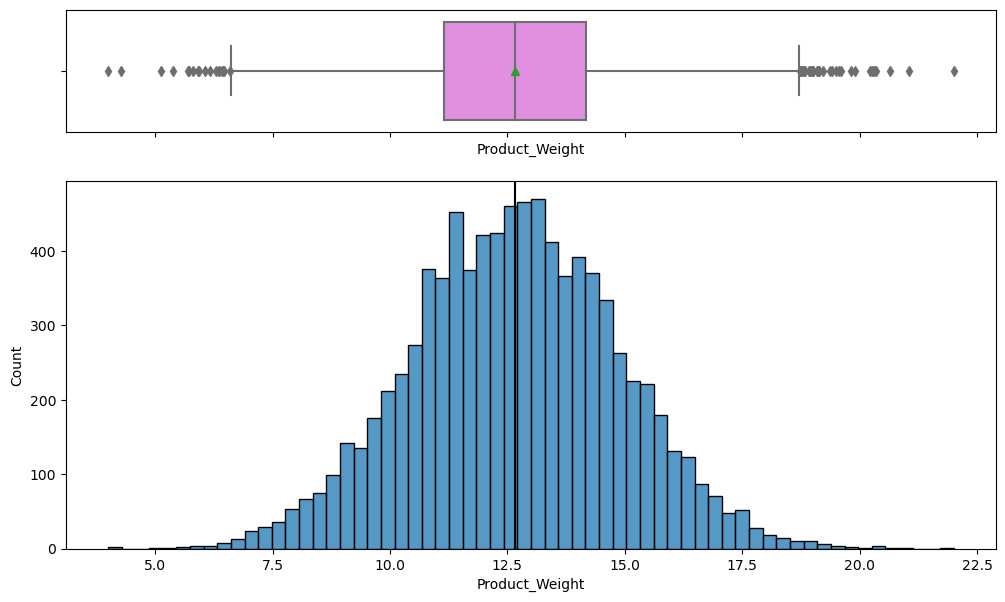

In [115]:
histogram_boxplot(data, "Product_Weight")

**Observation:**
- Product weight is symmetrically distributed around the mean. Mean and Median are the same and there are some outliers on lower and higher side. 


**Product_Allocated_Area**

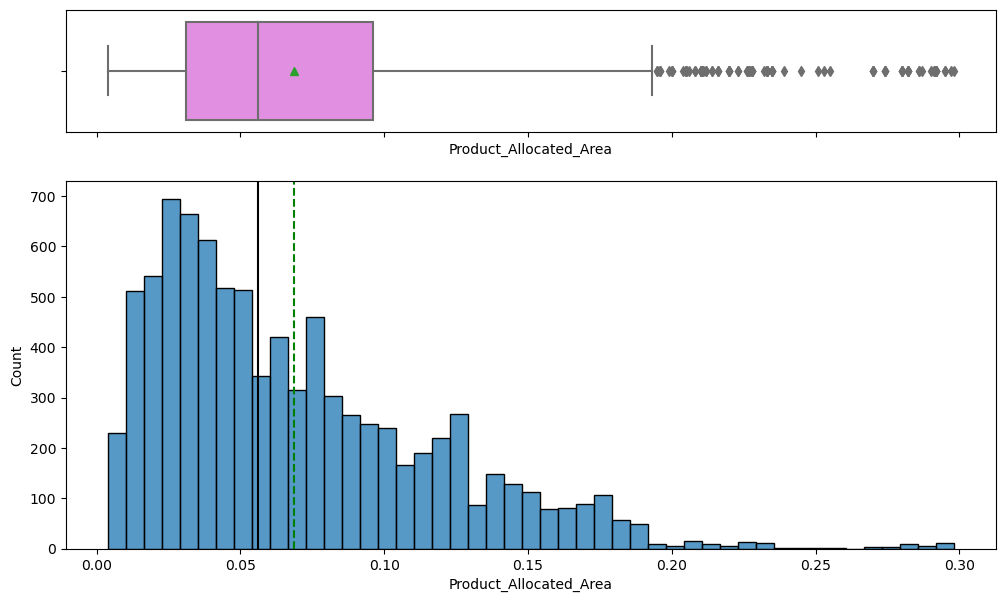

In [116]:
# Plot the histogram and the boxplot for 'Product_Allocated_Area'
histogram_boxplot(data, "Product_Allocated_Area")

**Observation:**
-  product allocated area distribution is skewed on the right with many outliers on higher side. Due to this the mean is higher than median
- Histogram shows that more than half the products are allocated in 0.05 units or less.
- there are some outliers on the higher side, which occupy more than 0.2 units of Area.

**Product_MRP**

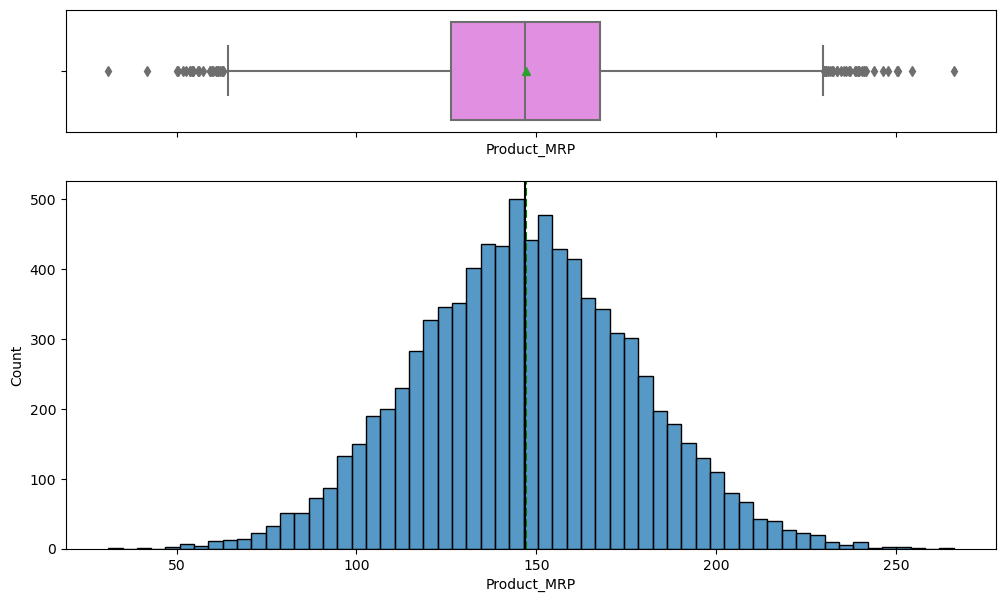

In [117]:
# Plot the histogram and the boxplot for 'Product_MRP'
histogram_boxplot(data, "Product_MRP")

**Observation:**
- product MRP is normally distributed around the mean of 150, 
- mean and median are almost the same.
- there are some outliers on lower as well as higher side

**Product_Store_Sales_Total**

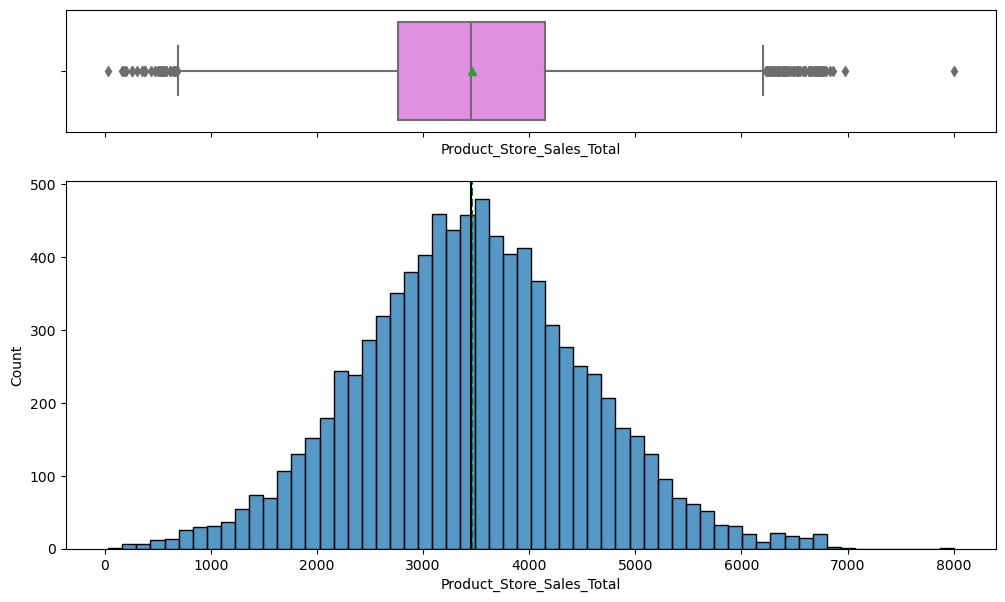

In [118]:
# Plot the histogram and the boxplot for 'Product_Store_Sales_Total'
histogram_boxplot(data, "Product_Store_Sales_Total")

**Observation:**
- Products to sales total is normally distributed around a mean of 3500 units
- mean, and median are almost to same
- there is one product which is an outlier on the higher side at 8000 units

In [119]:
# Function to create labeled barplots


def labeled_barplot(data, feature, perc = False, n = None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # Length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize = (count + 1, 5))
    else:
        plt.figure(figsize = (n + 1, 5))

    plt.xticks(rotation = 90, fontsize = 15)
    ax = sns.countplot(
        data = data,
        x = feature,
        palette = "Paired",
        order = data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # Percentage of each class of the category
        else:
            label = p.get_height()  # Count of each level of the category

        x = p.get_x() + p.get_width() / 2  # Width of the plot
        y = p.get_height()  # Height of the plot

        ax.annotate(
            label,
            (x, y),
            ha = "center",
            va = "center",
            size = 12,
            xytext = (0, 5),
            textcoords = "offset points",
        )  # Annotate the percentage

    plt.show()  # Show the plot

**Product_Sugar_Content**

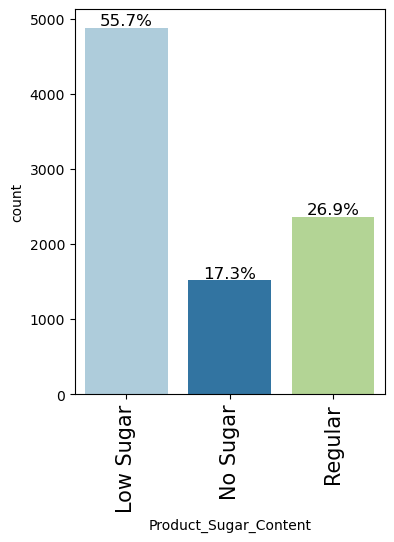

In [120]:
labeled_barplot(data, "Product_Sugar_Content", perc = True) # Plot for Product_Sugar_Content

**Observations:**
- 55.7% of the products are low sugar, following products with regular sugar at 26.9% and then products with no sugar at 17.3%.


**Product_Type**

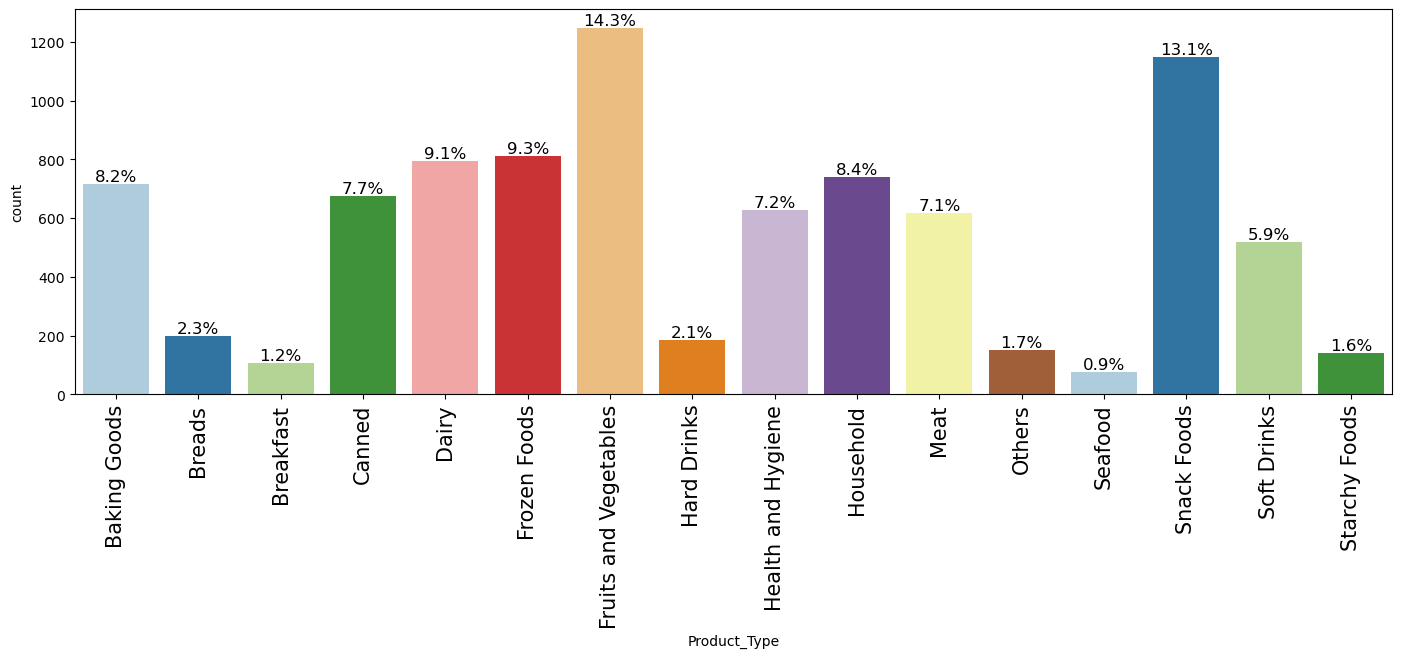

In [121]:
# Plot the labelled barplot for 'Product_Type'
labeled_barplot(data, "Product_Type", perc = True) 


**Observations:**
- 'fruits and vegetables', snack foods, dairy & frozen foods are some of the most popular categories of products

**Store_Id**

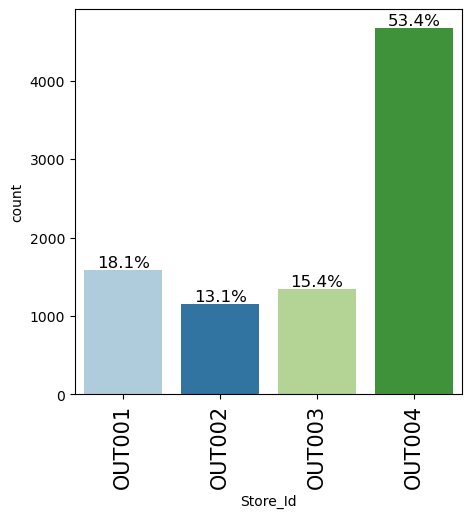

In [122]:
# Plot the labelled barplot for 'Store_Id'
labeled_barplot(data, "Store_Id", perc = True) 

**Observations:**
- Stores with store ID OUT004 has the most variety of products, with OUT001 following at second place


**Store_Size**

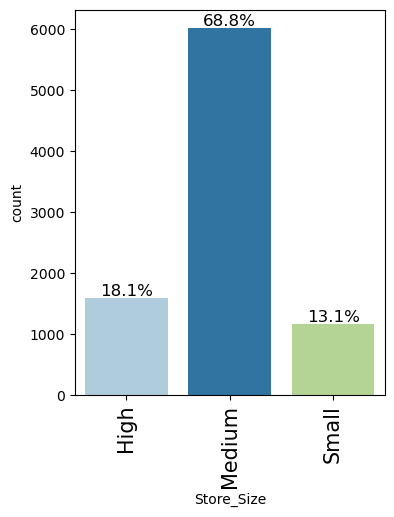

In [123]:
# Plot the labelled barplot for 'Store_Size'
labeled_barplot(data, "Store_Size", perc = True) 

**Observations:**
- Medium sized stores have most variety of products
- High and Small size stores have relatively smaller number of products to choose from

**Store_Location_City_Type**

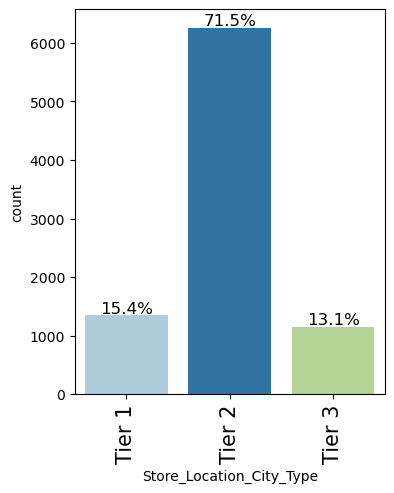

In [124]:
# Plot the labelled barplot for 'Store_Locatiom_City_Type'
labeled_barplot(data, "Store_Location_City_Type", perc = True) 

**Observations:**
- Stores Located in Tier 2 have collectively the most variety of products

**Store_Type**

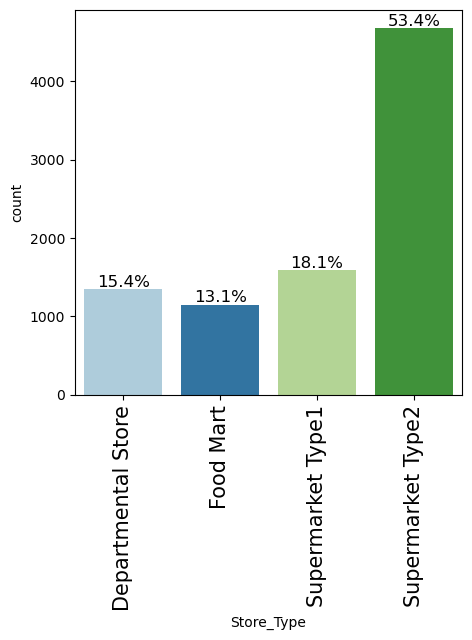

Store_Id  Store_Type          Store_Size  Store_Location_City_Type
OUT001    Supermarket Type1   High        Tier 2                      1586
OUT002    Food Mart           Small       Tier 3                      1152
OUT003    Departmental Store  Medium      Tier 1                      1349
OUT004    Supermarket Type2   Medium      Tier 2                      4676
dtype: int64

In [126]:
# Plot the labelled barplot for 'Store_Type'
labeled_barplot(data, "Store_Type", perc = True) 

# data.groupby(['Store_Id', 'Store_Type']).nunique()

data.groupby(['Store_Id', 'Store_Type'])['Store_Size', 'Store_Location_City_Type'].value_counts()

**Observations:**
- Supermarket type 2 has most variety of products
- Data here respresents products from 4 stores each of which is of a different store type
- More details about the 4 stores' size and location can be seen in table above


### **Bivariate Analysis**

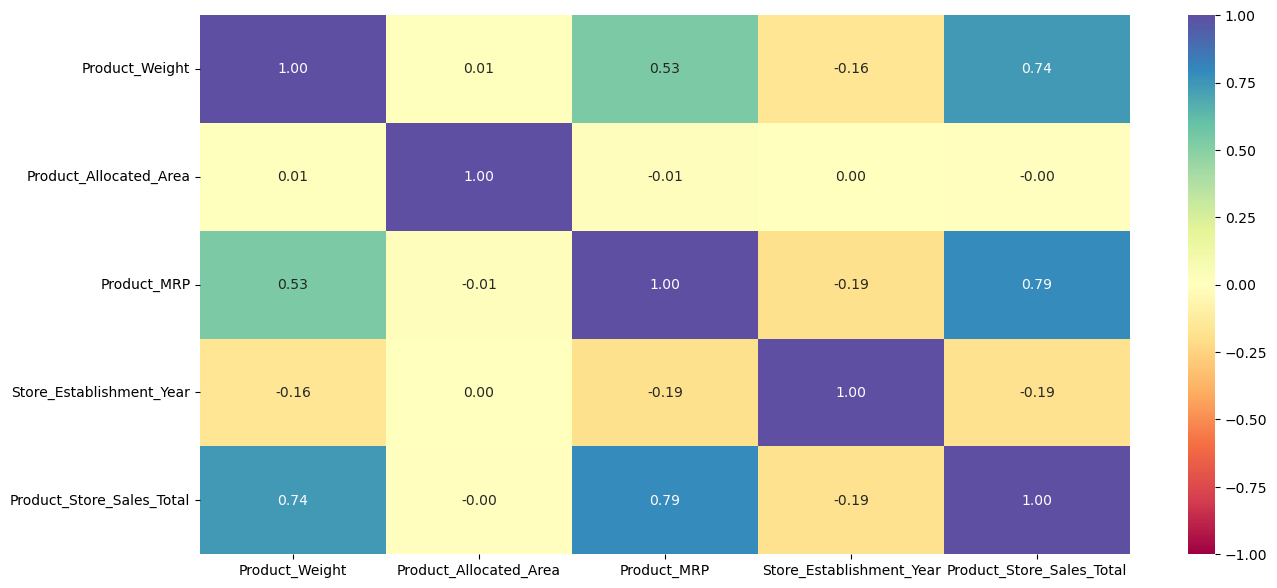

In [127]:
# Correlation check
cols_list = data.select_dtypes(include = np.number).columns.tolist()

plt.figure(figsize = (15, 7))

sns.heatmap(
    data[cols_list].corr(), annot = True, vmin = -1, vmax = 1, fmt = ".2f", cmap = "Spectral"
)

plt.show()

**Let's check the distribution of our target variable i.e Product_Store_Sales_Total with the numeric columns**

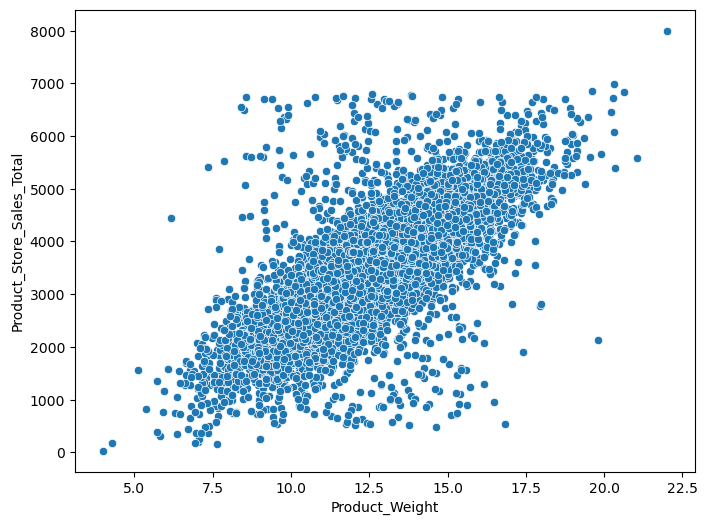

In [128]:
plt.figure(figsize = [8, 6])

sns.scatterplot(x = data.Product_Weight, y = data.Product_Store_Sales_Total)

plt.show()

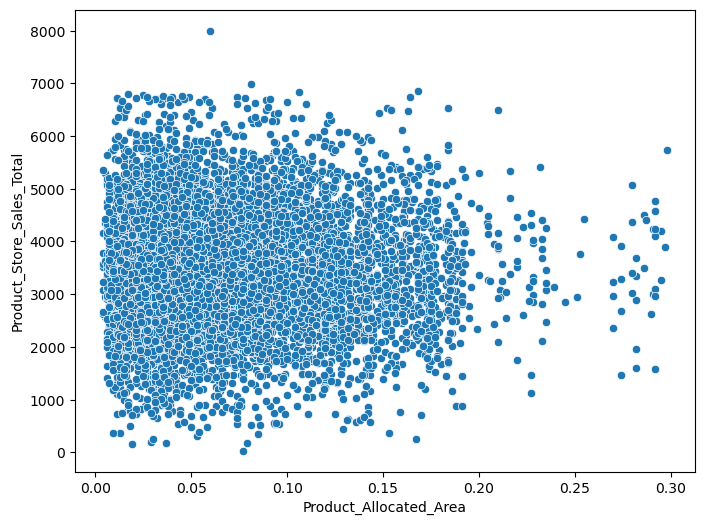

In [129]:
# Plot the scatterplot of Product_Allocated_Area against Product_Store_Sales_Total 
plt.figure(figsize = [8, 6])

sns.scatterplot(x = data.Product_Allocated_Area, y = data.Product_Store_Sales_Total)

plt.show()

**Observations:__**

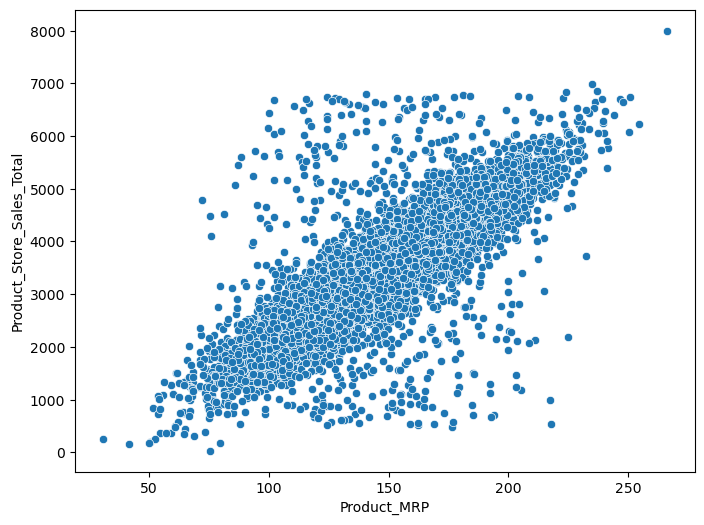

In [130]:
# Plot the scatterplot of Product_MRP against Product_Store_Sales_Total 
plt.figure(figsize = [8, 6])

sns.scatterplot(x = data.Product_MRP, y = data.Product_Store_Sales_Total)

plt.show()

**Observations:**
- product weight and Product_Store_Sales_Total seems to have a strong positive correlation, which means heavier procts contributed to higher sales revenue
- Product MRP, and product store sales total seems to have a strong positive correlation, which means more expensive products contributed to higher sales revenue.
- product allocated area and product steals has no correlation.


**Let us see from which product type the company is generating most of the revenue**

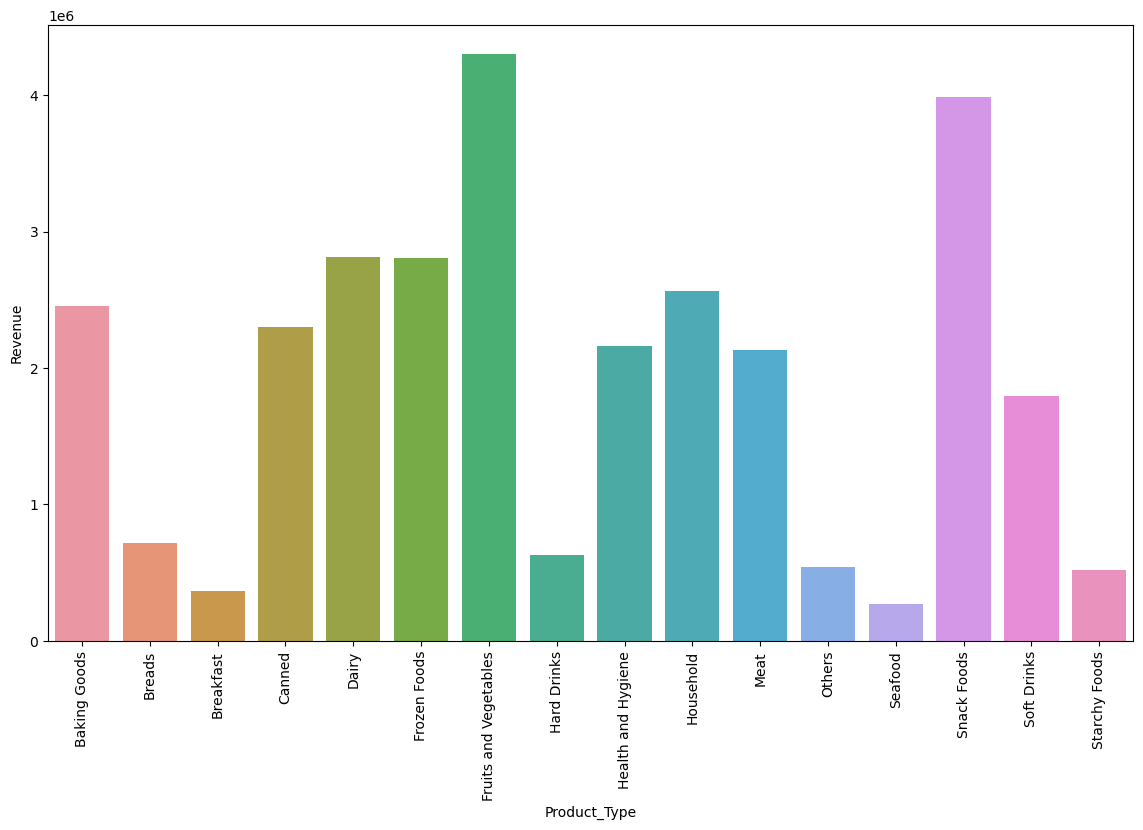

In [131]:
def plotRevenueFor(df, column):
    
    plt.figure(figsize = [14, 8])

    plt.xticks(rotation = 90)

    a = sns.barplot(x = df[column], y = df.Product_Store_Sales_Total)

    a.set_xlabel(column)

    a.set_ylabel("Revenue")

    plt.show()
    
df_revenue1 = data.groupby(["Product_Type"], as_index = False)[
    "Product_Store_Sales_Total"
].sum()

plotRevenueFor(df_revenue1, 'Product_Type')

**Product_Sugar_Content**

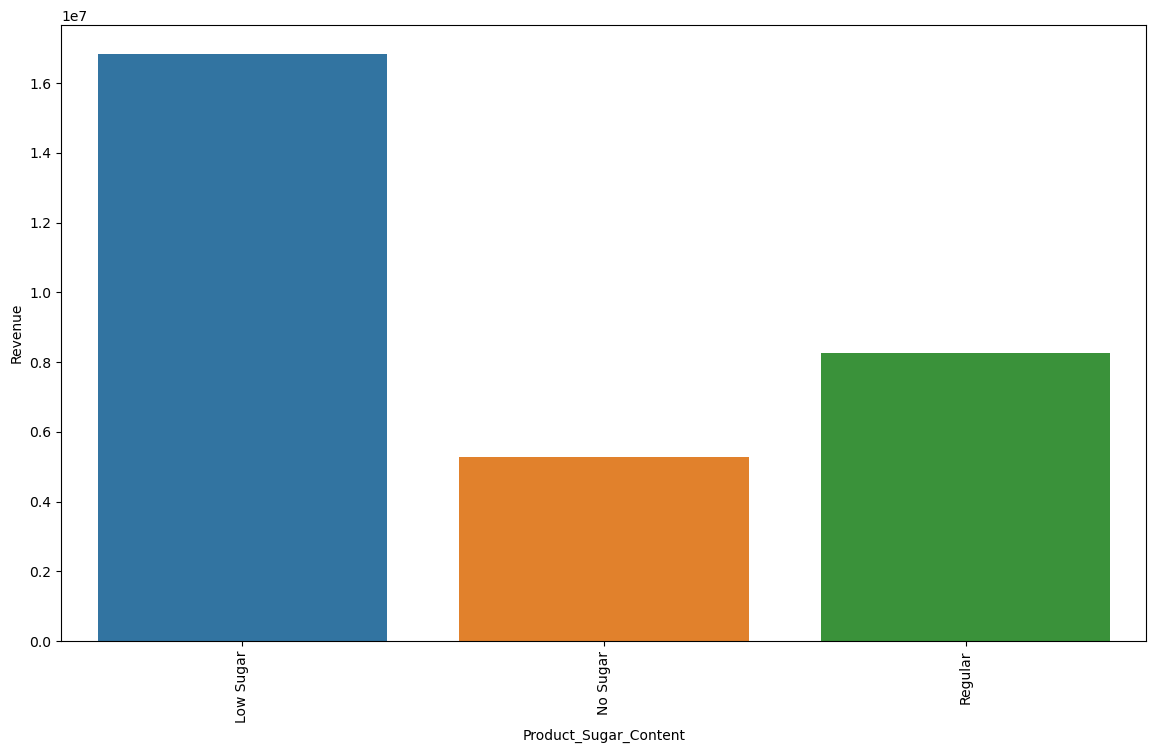

In [132]:
# Plot the barplot to see how much Product_Sugar_Content is generating the revenue
df_sugar = data.groupby(["Product_Sugar_Content"], as_index = False)[
    "Product_Store_Sales_Total"
].sum()

plotRevenueFor(df_sugar, 'Product_Sugar_Content')


**Observations:**
- low low sugar products gain most revenue, followed by regular and then no sugar

**Let us see from which type of stores and locations the revenue generation is more**

**Store_Id**

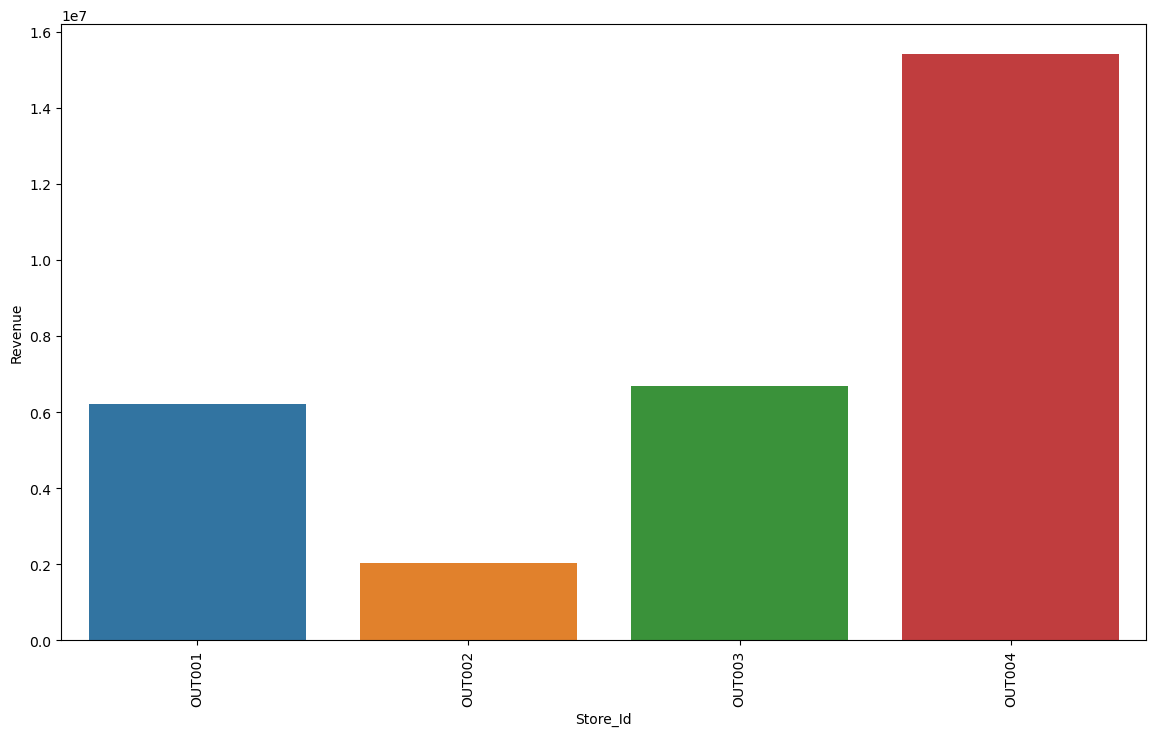

In [133]:
# Plot the barplot to see how much Store_Id is generating the revenue
df_sugar = data.groupby(["Store_Id"], as_index = False)[
    "Product_Store_Sales_Total"
].sum()

plotRevenueFor(df_sugar, 'Store_Id')


**Observations:**
- OUT004 store has most revenue


**Store_Size**

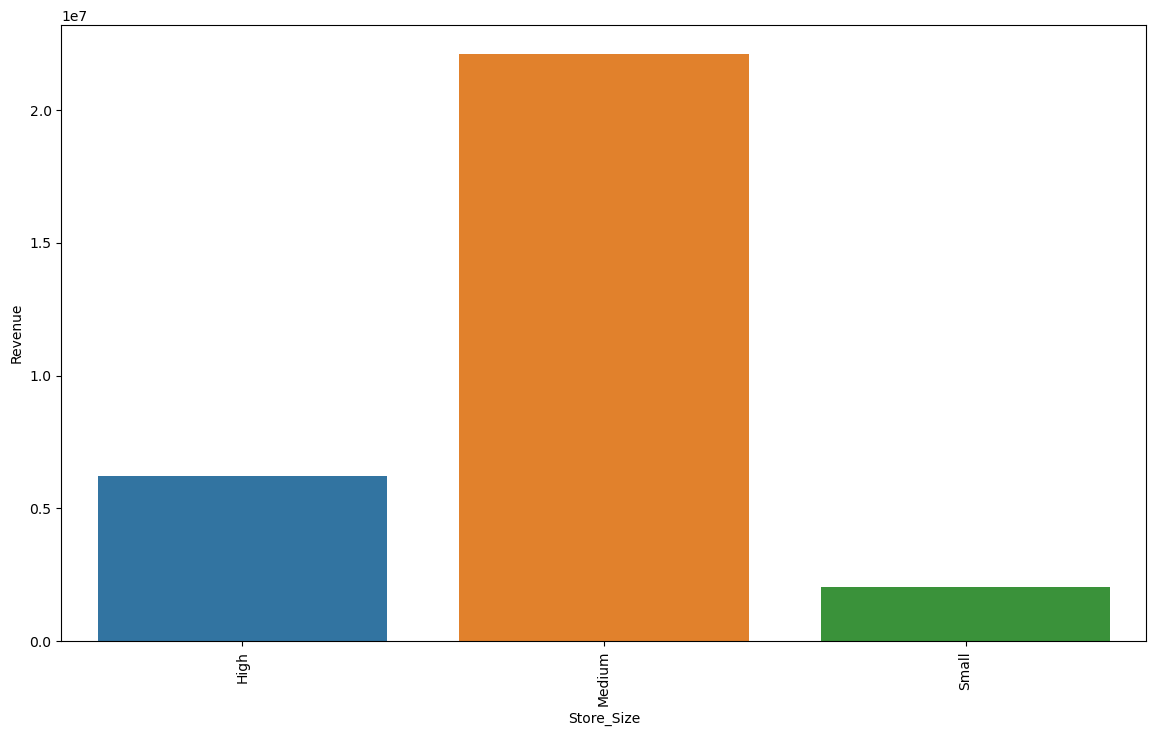

In [134]:
# Plot the barplot to see how much Store_Size is generating the revenue
df_size = data.groupby(["Store_Size"], as_index = False)[
    "Product_Store_Sales_Total"
].sum()

plotRevenueFor(df_size, 'Store_Size')


**Observations:__**

**Store_Location_City_Type**

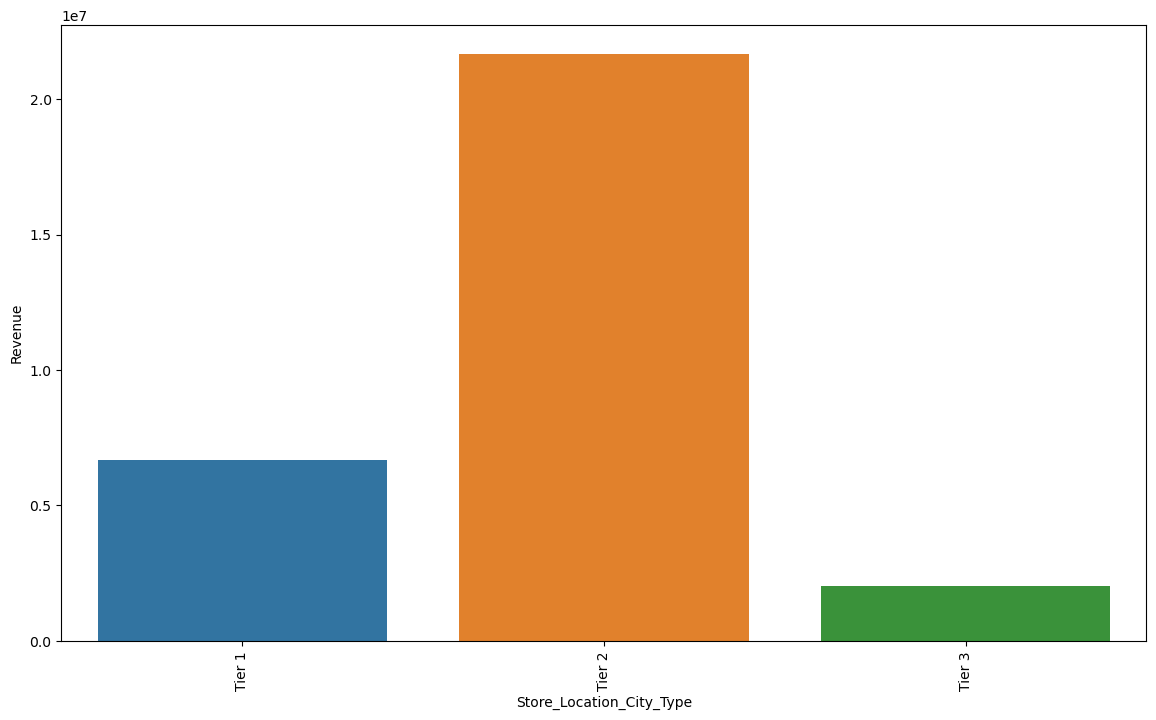

In [135]:
# Plot the barplot to see how much Store_Location_City_Type is generating the revenue
df_location = data.groupby(["Store_Location_City_Type"], as_index = False)[
    "Product_Store_Sales_Total"
].sum()

plotRevenueFor(df_location, 'Store_Location_City_Type')


**Observations:__**

**Store_Type**

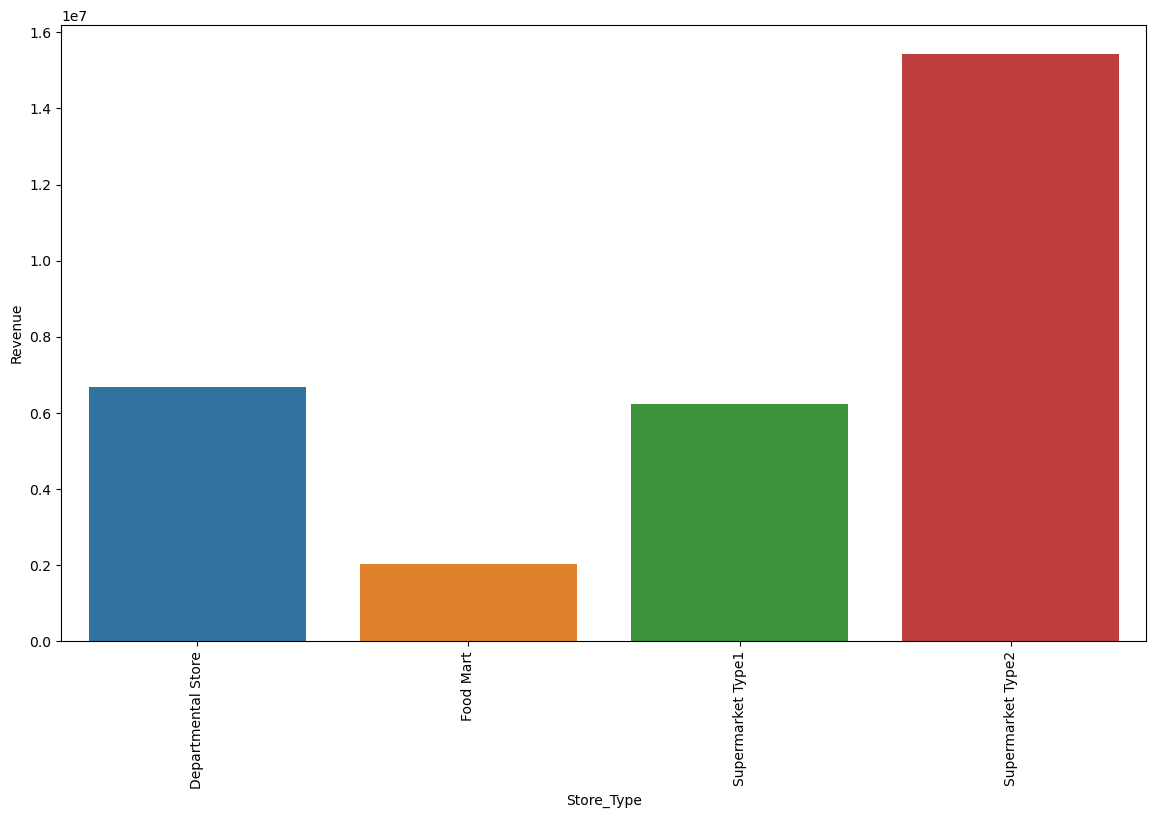

In [136]:
# Plot the barplot to see how much Store_Type is generating the revenue
df_type = data.groupby(["Store_Type"], as_index = False)[
    "Product_Store_Sales_Total"
].sum()

plotRevenueFor(df_type, 'Store_Type')

**Observations:__**

**Let's check the distribution of our target variable i.e Product_Store_Sales_Total with the other categorical columns**

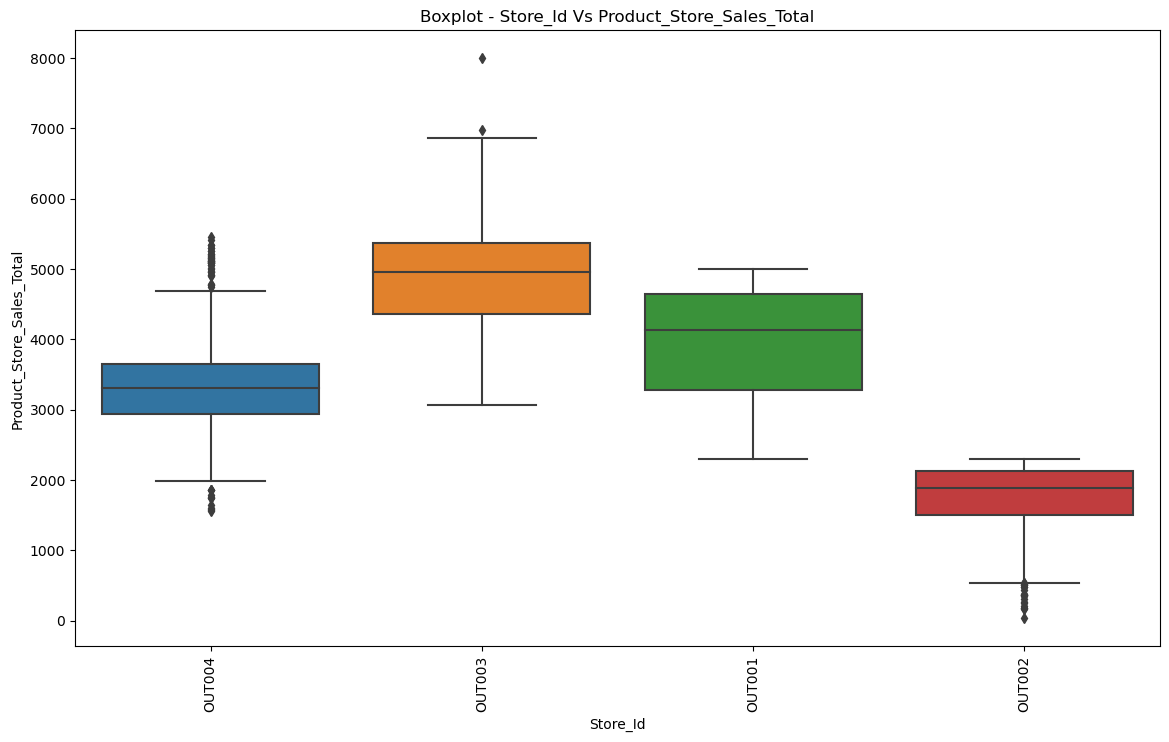

In [137]:
def bivariateBoxplot(df, x, y):

    plt.figure(figsize = [14, 8])

    sns.boxplot(x=df[x], y=df[y])

    plt.xticks(rotation = 90)

    plt.title("Boxplot - "+x+" Vs "+y)

    plt.xlabel(x)

    plt.ylabel(y)

    plt.show()
    
bivariateBoxplot(data, 'Store_Id', 'Product_Store_Sales_Total')

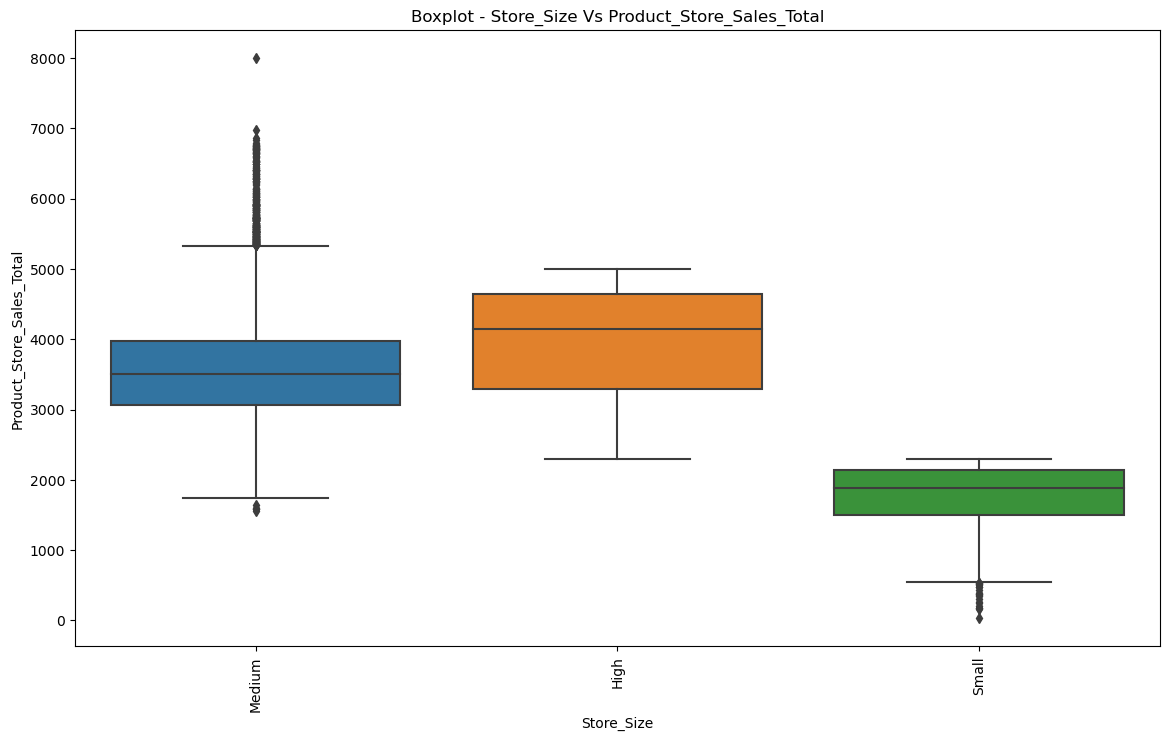

In [138]:
# Plot the boxplot of Store size against Product_Store_Sales_Total 
bivariateBoxplot(data, 'Store_Size', 'Product_Store_Sales_Total')

**Let's now try to find out some relationship between the other columns**

**Generally certain product types will have higher product weight than others. Let's have a look**

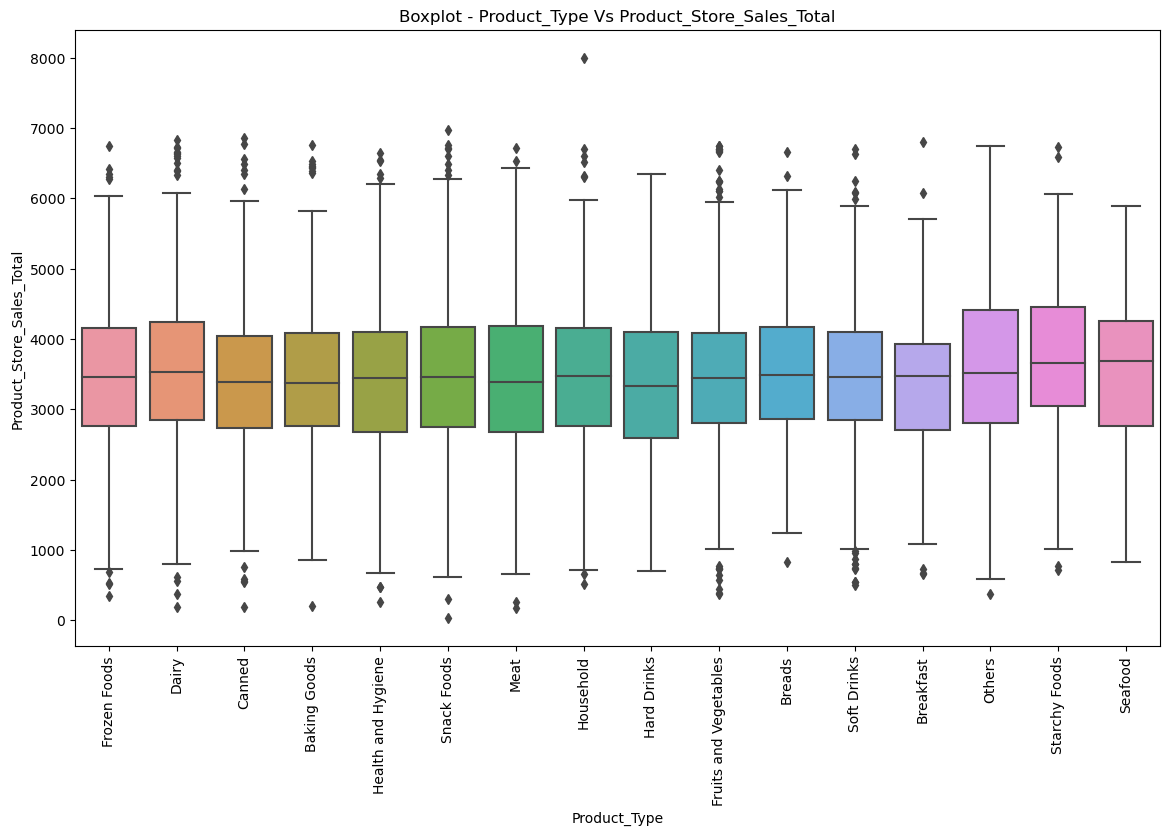

In [139]:
# Plot the boxplot of Product_Type against Product_Weight 
bivariateBoxplot(data, 'Product_Type', 'Product_Store_Sales_Total')

**Observations:__**

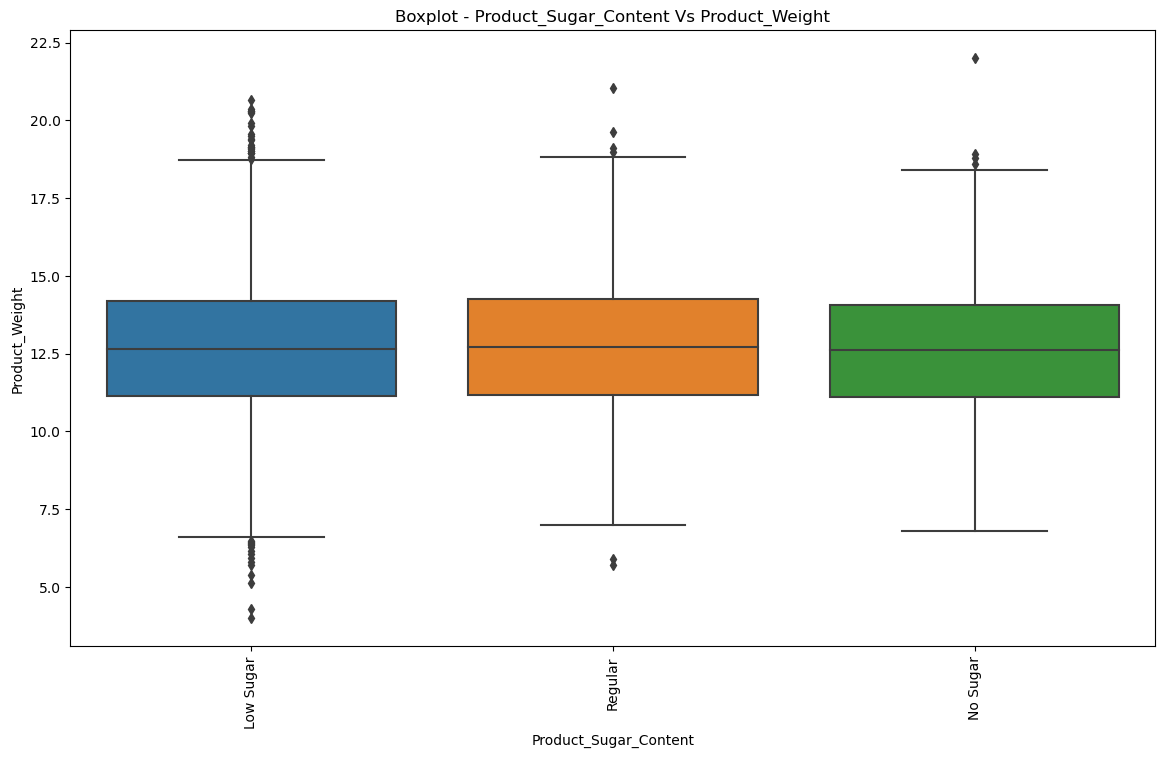

In [140]:
# Plot the box plot of Product_Sugar_Content against Product_Weight 
bivariateBoxplot(data, 'Product_Sugar_Content', 'Product_Weight')

**Observations:__**

**Let's find out whether there is some relationship between the weight of the product and its sugar content**

In [ ]:
# Plot a box plot of Product_Sugar_Content against Product_Weight 

**Observations:__**

**Let's analyze the sugar content of different product types**

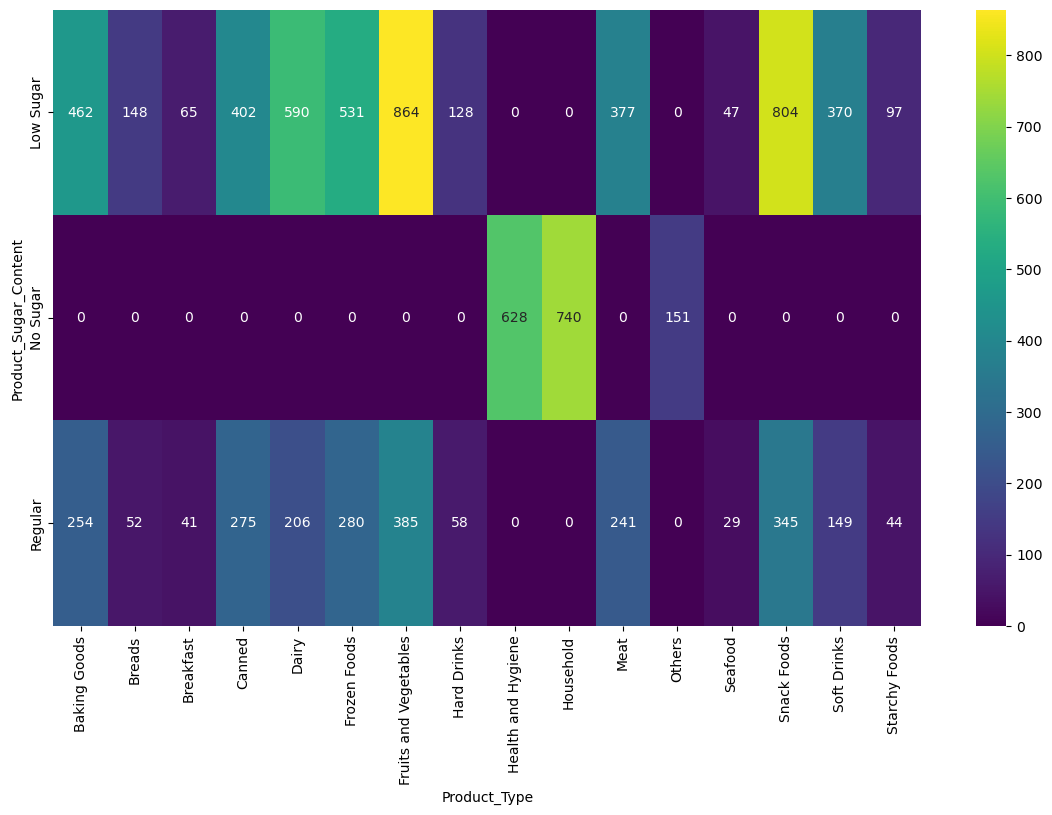

In [141]:
def bivariateHeatmap(x,y):
    
    plt.figure(figsize = (14, 8))

    sns.heatmap(
        pd.crosstab(data[y], data[x]),
        annot=True,
        fmt = "g",
        cmap = "viridis",
    )

    plt.ylabel(y)
    plt.xlabel(x)
    plt.show()
    
bivariateHeatmap("Product_Type", "Product_Sugar_Content")

#### Let's find out how many items of each product type has been sold in each of the stores

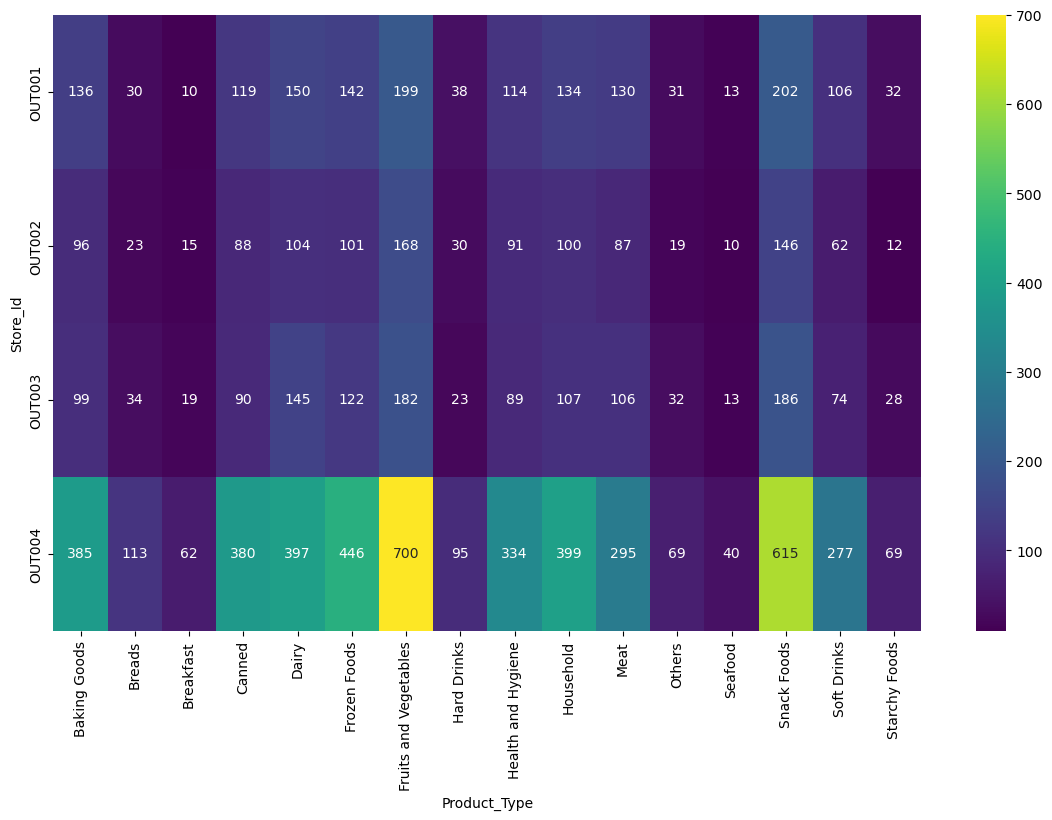

In [142]:
# Plot heatmap with and Product_Type as x and Store_Ids as y
bivariateHeatmap('Product_Type', 'Store_Id')

**Observations:__**

#### Different product types have different prices. Let's analyze the trend

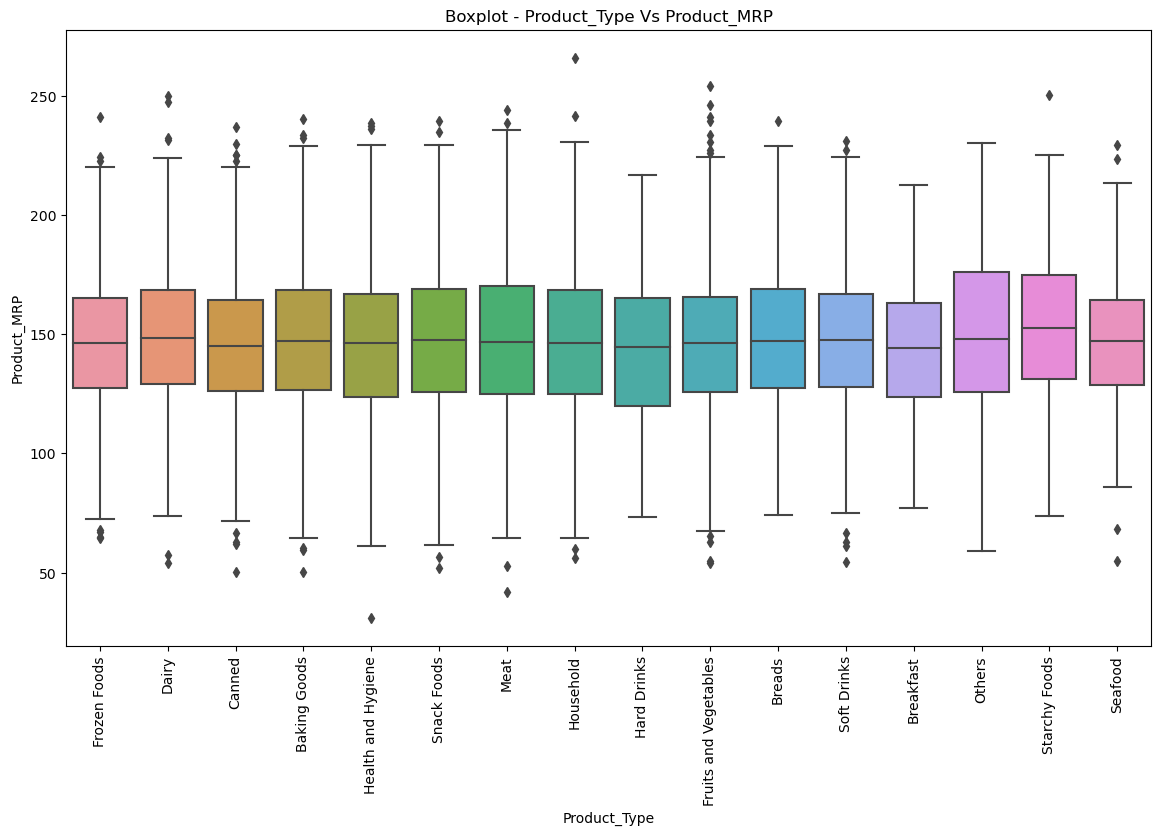

In [143]:
# Plot a box plot of Product_Type against Product_MRP
bivariateBoxplot(data, 'Product_Type', 'Product_MRP')

**Observations:__**

#### Let's find out how the Product_MRP varies with the different stores

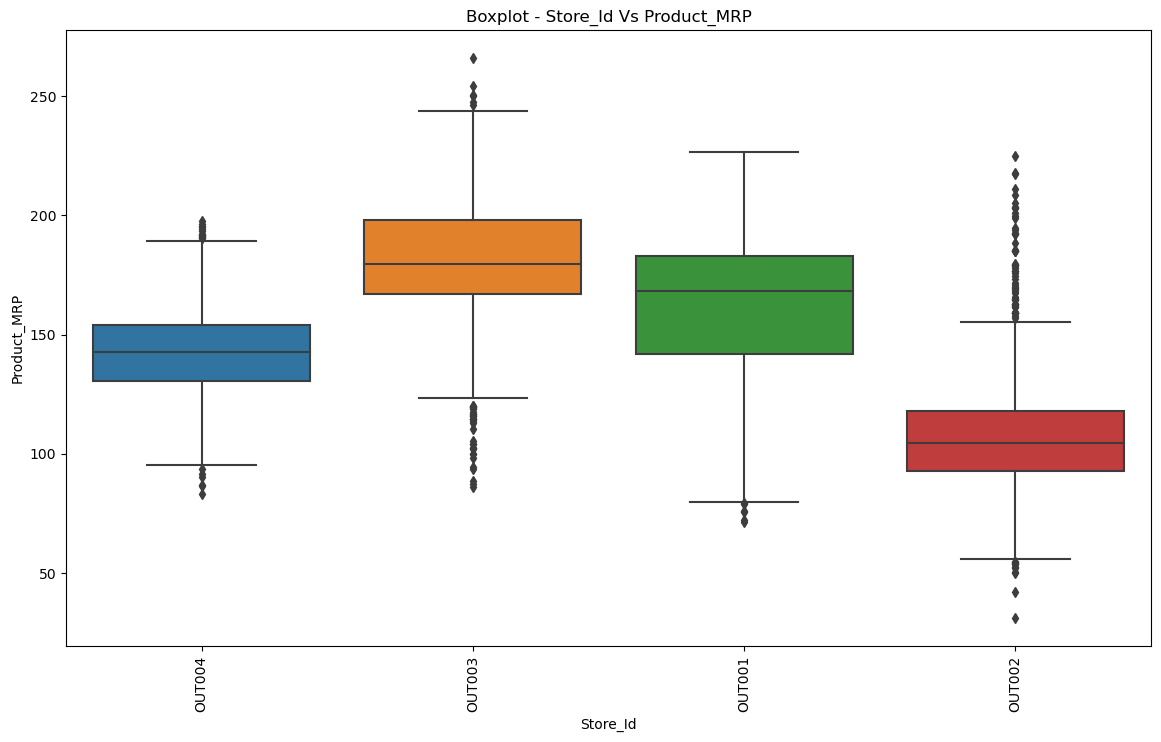

In [144]:
# Plot a box plot of box plot of Store_Id against Product_MRP
bivariateBoxplot(data, 'Store_Id', 'Product_MRP')

**Observations:**
- OUT003 is the most expensive store, tears OUT002 is most affordable store

**Let's delve deeper and do a detailed analysis of each of the stores**

**OUT001**

In [ ]:
data.loc[data["Store_Id"] == "OUT001"].describe(include = "all").T 

In [ ]:
data.loc[data["Store_Id"] == "OUT001", "Product_Store_Sales_Total"].sum()

In [ ]:
df_OUT001 = (
    data.loc[data["Store_Id"] == "OUT001"]
    .groupby(["Product_Type"], as_index = False)["Product_Store_Sales_Total"]
    .sum()
)

In [ ]:
plt.figure(figsize = [14, 8])
plt.xticks(rotation = 90)
plt.xlabel("Product_Type")
plt.ylabel("Product_Store_Sales_Total")
plt.title("OUT001")
sns.barplot(x = df_OUT001.Product_Type, y = df_OUT001.Product_Store_Sales_Total)
plt.show()

**Observations:__**

**OUT002**

In [ ]:
# Print the statistical summary where Store_Id is OUT002

In [ ]:
# Print the total revenue from the OUT002 Store_Id 

In [ ]:
df_OUT002 = _______

In [ ]:
# Plot the barplot for Product_Type from df_OUT002 against Product_Store_Sales_Total

**Observations:__**

**OUT003**

In [ ]:
# Print the statistical summary where Store_Id is OUT003

In [ ]:
# Print the total revenue from the OUT003 Store_Id 

In [ ]:
df_OUT003 = _______

In [ ]:
# Plot the barplot for Product_Type from df_OUT003 against Product_Store_Sales_Total

**Observations:__**

**OUT004**

In [ ]:
# Print the statistical summary where Store_Id is OUT004

In [ ]:
# Print the total revenue from the OUT004 Store_Id 

In [ ]:
df_OUT004 = _______

In [ ]:
# Plot the barplot for Product_Type from df_OUT004 against Product_Store_Sales_Total

**Observations:__**

#### Let's find out the revenue generated by the stores from each of the product types

In [ ]:
df1 = data.groupby(["Product_Type", "Store_Id"], as_index = False)[
    "Product_Store_Sales_Total"
].sum()

df1

**Observations:_____**

#### Let's find out the revenue generated by the stores from products having different levels of sugar content

In [ ]:
df2 = data.groupby("Product_Sugar_Content", "Store_Id"], as_index=False)["Product_Store_Sales_Total"].sum() # Fill in the blanks to find the revenue generated by each store for the different sugar content level items 
df2

**Observations:____**

## **Data Preprocessing**

### **Feature Engineering**

**A store which has been in the business for a long duration is more trustworthy than the newly established ones. On the other hand, older stores may sometimes lack infrastructure if proper attention is not given. So let us calculate the current age of the store and incorporate that in our model.(The data of the sales records was collected in 2021, so we will use 2021 as the base year to calculate the store age)**

In [146]:
# Outlet Age
data["Store_Age_Years"] = 2021 - data["Store_Establishment_Year"]
data.head()

,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total,Product_Id_char,Store_Age_Years
0,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40,FD,12
1,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02,FD,22
2,14.28,Regular,0.031,Canned,162.08,OUT001,1987,High,Tier 2,Supermarket Type1,4130.16,FD,34
3,12.10,Low Sugar,0.112,Baking Goods,186.31,OUT001,1987,High,Tier 2,Supermarket Type1,4132.18,FD,34
4,9.57,No Sugar,0.010,Health and Hygiene,123.67,OUT002,1998,Small,Tier 3,Food Mart,2279.36,NC,23


**We have 16 different product types in our dataset. So let us make two broad categories, perishables and non perishables, in order to reduce the number of product types.**

In [148]:
perishables = [
    "Dairy",
    "Meat",
    "Fruits and Vegetables",
    "Breakfast",
    "Breads",
    "Seafood",
]

In [149]:
def change(x):
    if x in perishables:
        return "Perishables"
    else:
        return "Non Perishables"


data.Product_Type.apply(change)

0       Non Perishables
1           Perishables
2       Non Perishables
3       Non Perishables
4       Non Perishables
             ...       
8758    Non Perishables
8759    Non Perishables
8760    Non Perishables
8761    Non Perishables
8762    Non Perishables
Name: Product_Type, Length: 8763, dtype: object

In [150]:
change1 = []
for i in range(0, len(data)):
    if data.Product_Type[i] in perishables:
        change1.append("Perishables")
    else:
        change1.append("Non Perishables")

In [153]:
data["Product_Type_Category"] = pd.Series(change1) # Fill in the blank and use change1 to create a new column

In [154]:
data.head()

,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total,Product_Id_char,Store_Age_Years,Product_Type_Category
0,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40,FD,12,Non Perishables
1,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02,FD,22,Perishables
2,14.28,Regular,0.031,Canned,162.08,OUT001,1987,High,Tier 2,Supermarket Type1,4130.16,FD,34,Non Perishables
3,12.10,Low Sugar,0.112,Baking Goods,186.31,OUT001,1987,High,Tier 2,Supermarket Type1,4132.18,FD,34,Non Perishables
4,9.57,No Sugar,0.010,Health and Hygiene,123.67,OUT002,1998,Small,Tier 3,Food Mart,2279.36,NC,23,Non Perishables


### **Outlier Check**

- Let's check for outliers in the data.

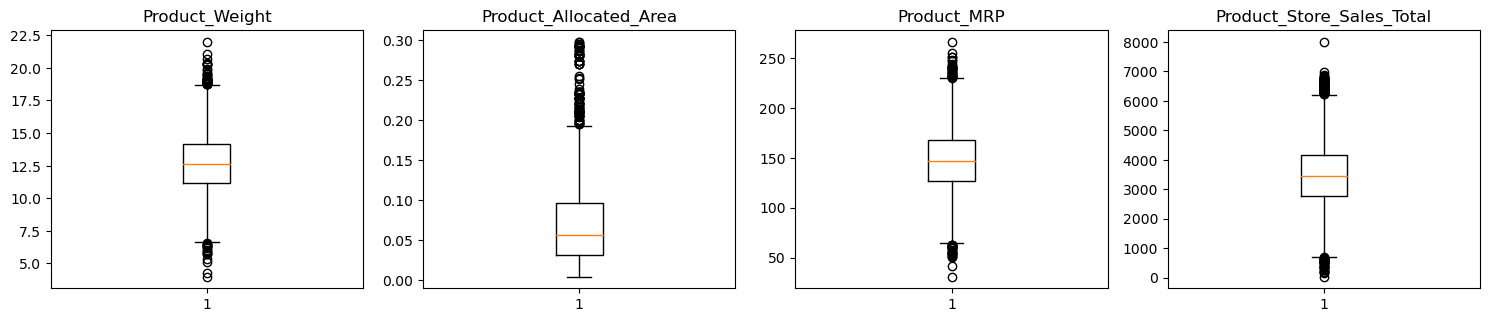

In [155]:
# Outlier detection using boxplot
numeric_columns = data.select_dtypes(include = np.number).columns.tolist()
numeric_columns.remove("Store_Establishment_Year")
numeric_columns.remove("Store_Age_Years")


plt.figure(figsize = (15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis = 1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**Observations:________**

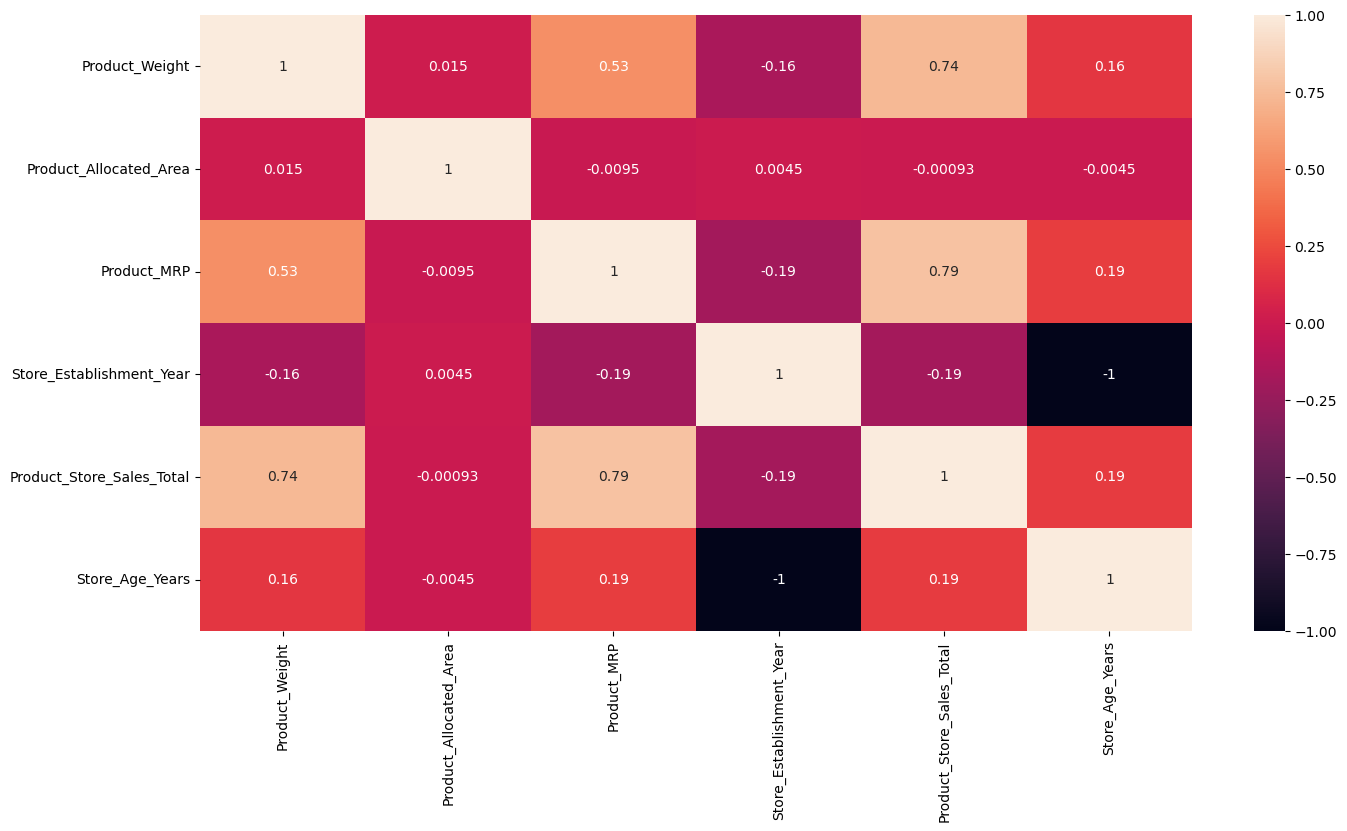

In [156]:
plt.figure(figsize = (16, 8))
sns.heatmap(data.corr(), annot = True)
plt.show()

**Observations:____**

### **Data Preparation for modeling**

- We want to forecast the Product_Store_Sales_Total. 
- Before we proceed to build a model, we'll have to encode categorical features and drop the unnecessary columns
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [160]:
# Drop the "Product_Type", "Store_Id", "Store_Establishment_Year" variables from the data
data.drop(["Product_Type", "Store_Id", "Store_Establishment_Year"], axis=1, inplace=True)



In [162]:
# Apply get_dummies on the dataframe data
categoricals = data.select_dtypes(include='object').columns

print(categoricals)

# Creating dummy variables
data = pd.get_dummies(data = data, columns = categoricals, drop_first = True)      


Index(['Product_Sugar_Content', 'Store_Size', 'Store_Location_City_Type',
       'Store_Type', 'Product_Id_char', 'Product_Type_Category'],
      dtype='object')


In [164]:
# Separating features and the target column

X = data.drop(['Product_Store_Sales_Total'], axis=1)
Y = data['Product_Store_Sales_Total']

In [165]:
X = sm.add_constant(X)

In [170]:
# Splitting the data into train and test sets in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1)

In [171]:
X_train.shape, X_test.shape

((6134, 17), (2629, 17))

### **Check for Multicollinearity**

We will use the Variance Inflation Factor (VIF), to check if there is multicollinearity in the data.

Features having a VIF score > 5 will be dropped / treated till all the features have a VIF score < 5

In [172]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to check VIF
def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # Calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif


print(checking_vif(X_train))

                              feature       VIF
0                               const  0.000000
1                      Product_Weight  1.752928
2              Product_Allocated_Area  1.001184
3                         Product_MRP  1.885058
4                     Store_Age_Years       inf
5      Product_Sugar_Content_No Sugar       inf
6       Product_Sugar_Content_Regular  1.088506
7                   Store_Size_Medium       inf
8                    Store_Size_Small       inf
9     Store_Location_City_Type_Tier 2       inf
10    Store_Location_City_Type_Tier 3       inf
11               Store_Type_Food Mart       inf
12       Store_Type_Supermarket Type1       inf
13       Store_Type_Supermarket Type2       inf
14                 Product_Id_char_FD  2.774371
15                 Product_Id_char_NC       inf
16  Product_Type_Category_Perishables  1.217690


**Observations:**
- The VIF of Product_Weight, Product_Allocation_Area, Product_MRP, Product_Id_char_FD are less., notice we're not looking at dummy variables here

In [173]:
X_train = X_train.drop('Store_Age_Years',axis = 1)

X_test = X_test.drop('Store_Age_Years',axis = 1)

### **Check for Multicollinearity**

We will use the Variance Inflation Factor (VIF), to check if there is multicollinearity in the data.

Features having a VIF score > 5 will be dropped / treated till all the features have a VIF score < 5

In [174]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to check VIF
def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns # Store the train columns

    # Calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif


print(checking_vif(X_train))

                              feature       VIF
0                               const  0.000000
1                      Product_Weight  1.752928
2              Product_Allocated_Area  1.001184
3                         Product_MRP  1.885058
4      Product_Sugar_Content_No Sugar       inf
5       Product_Sugar_Content_Regular  1.088506
6                   Store_Size_Medium       inf
7                    Store_Size_Small       inf
8     Store_Location_City_Type_Tier 2       inf
9     Store_Location_City_Type_Tier 3       inf
10               Store_Type_Food Mart       inf
11       Store_Type_Supermarket Type1       inf
12       Store_Type_Supermarket Type2       inf
13                 Product_Id_char_FD  2.774371
14                 Product_Id_char_NC       inf
15  Product_Type_Category_Perishables  1.217690


**Observations:__**

## **Building Models**

Let's create a function to calculate the performance metrics for our regression model so that we don't need to use the same code repeatedly. 

In [175]:
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_absolute_error, mean_squared_error

# Model Performance on test and train data
def model_pref(olsmodel, x_train, x_test):

    # Insample Prediction
    y_pred_train = olsmodel.predict(x_train)
    y_observed_train = y_train

    # Prediction on test data
    y_pred_test = olsmodel.predict(x_test)
    y_observed_test = y_test

    print(
        pd.DataFrame(
            {
                "Data": ["Train", "Test"],
                "RMSE": [
                    np.sqrt(mean_squared_error(y_pred_train, y_observed_train)),
                    np.sqrt(mean_squared_error(y_pred_test, y_observed_test)),
                ],
                "MAE": [
                    mean_absolute_error(y_pred_train, y_observed_train),
                    mean_absolute_error(y_pred_test, y_observed_test),
                ],
                
                "r2": [
                    r2_score(y_pred_train, y_observed_train),
                    r2_score(y_pred_test, y_observed_test),
                ],
            }
        )
    )

In [177]:
# Create the OLS model and fit it

# # Calling the OLS algorithm on the train features and the target variable
model1 = sm.OLS(y_train, X_train) 
ols_res_1 = model1.fit()

print(ols_res_1.summary())


                                OLS Regression Results                               
Dep. Variable:     Product_Store_Sales_Total   R-squared:                       0.824
Model:                                   OLS   Adj. R-squared:                  0.823
Method:                        Least Squares   F-statistic:                     2860.
Date:                       Sun, 30 Apr 2023   Prob (F-statistic):               0.00
Time:                               17:32:17   Log-Likelihood:                -46132.
No. Observations:                       6134   AIC:                         9.229e+04
Df Residuals:                           6123   BIC:                         9.236e+04
Df Model:                                 10                                         
Covariance Type:                   nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [ ]:
# Get the model summary
Product_Allocated_Area null hypothesis is true so can be removed

In [179]:
# Checking model1 performance
model_pref(ols_res_1, X_train, X_test)

    Data        RMSE         MAE        r2
0  Train  446.667654  262.110666  0.785927
1   Test  446.685287  266.690587  0.790208


**Observations:**
- model performed equally on train and test dataset so there's no overfitting
- r2 is good but can be improved
- Product_Allocated_Area p-value is high, null hypothesis of theta=0 is true, so it can be removed

### **Drop insignificant variables (variables with p-value > 0.05) from the above model and create the regression model again.**

In [181]:
X_train1 = X_train.drop(columns=['Product_Allocated_Area']) # Please drop the insiginificant variables from the X_train 


In [183]:
X_train1.head()
X_test1 = X_test.drop(columns=['Product_Allocated_Area']) # Please drop the insiginificant variables from the X_test

X_test1.head()

,const,Product_Weight,Product_MRP,Product_Sugar_Content_No Sugar,Product_Sugar_Content_Regular,Store_Size_Medium,Store_Size_Small,Store_Location_City_Type_Tier 2,Store_Location_City_Type_Tier 3,Store_Type_Food Mart,Store_Type_Supermarket Type1,Store_Type_Supermarket Type2,Product_Id_char_FD,Product_Id_char_NC,Product_Type_Category_Perishables
7441,1.0,12.76,158.59,0,0,1,0,1,0,0,0,1,1,0,0
6355,1.0,17.54,217.37,0,0,1,0,0,0,0,0,0,0,0,0
1271,1.0,12.02,201.24,0,1,1,0,0,0,0,0,0,0,0,0
3511,1.0,10.96,165.12,0,1,1,0,1,0,0,0,1,1,0,0
1821,1.0,13.32,175.00,0,0,0,0,1,0,0,1,0,1,0,1


In [184]:
# Create the OLS model and fit it
model2 = sm.OLS(y_train, X_train1) 
ols_res_2 = model2.fit()

print(ols_res_2.summary())


                                OLS Regression Results                               
Dep. Variable:     Product_Store_Sales_Total   R-squared:                       0.824
Model:                                   OLS   Adj. R-squared:                  0.823
Method:                        Least Squares   F-statistic:                     3178.
Date:                       Mon, 01 May 2023   Prob (F-statistic):               0.00
Time:                               13:19:48   Log-Likelihood:                -46133.
No. Observations:                       6134   AIC:                         9.229e+04
Df Residuals:                           6124   BIC:                         9.235e+04
Df Model:                                  9                                         
Covariance Type:                   nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [ ]:
# Get the model summary


In [185]:
# Checking model2 performance
model_pref(ols_res_2, X_train1, X_test1)

    Data        RMSE         MAE        r2
0  Train  446.717928  262.152492  0.785869
1   Test  446.571715  266.488803  0.790370


**Observations:**
Performance did not improve much

### **Checking the below linear regression assumptions**

1. **Mean of residuals should be 0**
2. **No Heteroscedasticity**
3. **Linearity of variables**
4. **Normality of error terms**

### **1. Check for mean residuals**

In [187]:
residuals = ols_res_2.resid

np.mean(residuals)

-6.834702930049706e-12

**Observations:____**

### **2. Check for homoscedasticity**

- Homoscedasticity - If the residuals are symmetrically distributed across the regression line, then the data is said to be homoscedastic.

- Heteroscedasticity- - If the residuals are not symmetrically distributed across the regression line, then the data is said to be heteroscedastic. In this case, the residuals can form a funnel shape or any other non-symmetrical shape.

- We'll use `Goldfeldquandt Test` to test the following hypothesis with alpha = 0.05:

    - Null hypothesis: Residuals are homoscedastic
    - Alternate hypothesis: Residuals have heteroscedastic

In [188]:
from statsmodels.stats.diagnostic import het_white

from statsmodels.compat import lzip

import statsmodels.stats.api as sms

In [190]:
name = ["F statistic", "p-value"]

test = sms.het_goldfeldquandt(y_train, X_train1)

lzip(name, test)

[('F statistic', 0.9838918491120908), ('p-value', 0.6732471518756709)]

**Observations:**
- p-value is > 0.05 so Null hypothesis cannot be rejected, Residuals are homoscedastic

### **3. Linearity of variables**

It states that the predictor variables must have a linear relation with the dependent variable.

To test the assumption, we'll plot residuals and the fitted values on a plot and ensure that residuals do not form a strong pattern. They should be randomly and uniformly scattered on the x-axis.

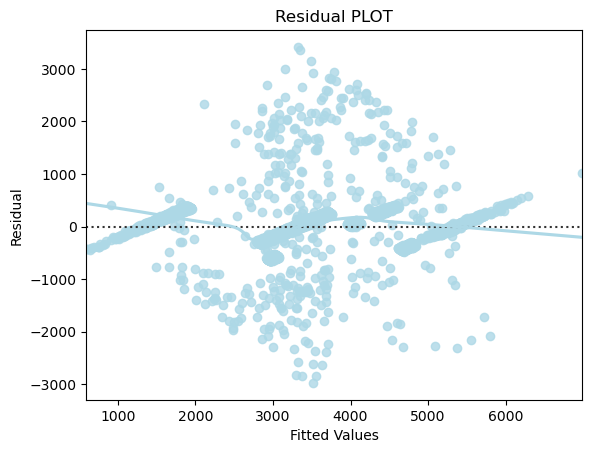

In [192]:
# Predicted values
fitted = ols_res_2.fittedvalues

# sns.set_style("whitegrid")
sns.residplot(x = fitted, y = residuals, color = "lightblue", lowess = True)

plt.xlabel("Fitted Values")

plt.ylabel("Residual")

plt.title("Residual PLOT")

plt.show()

**Observations:**
- Residuals are randomly scattorred uniformly around 0 value

### **4. Normality of error terms**

The residuals should be normally distributed.

<Axes: ylabel='Count'>

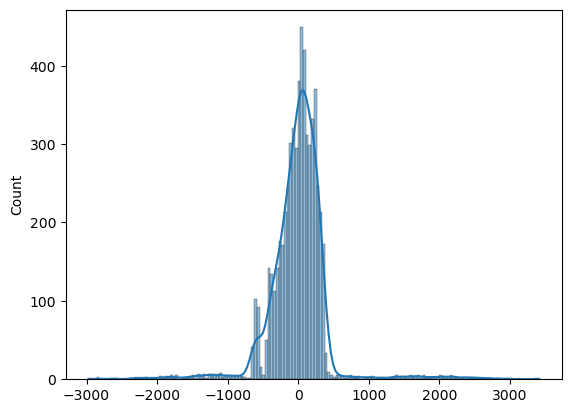

In [193]:
# Plot histogram of residuals
sns.histplot(residuals, kde=True)
# Write your code here

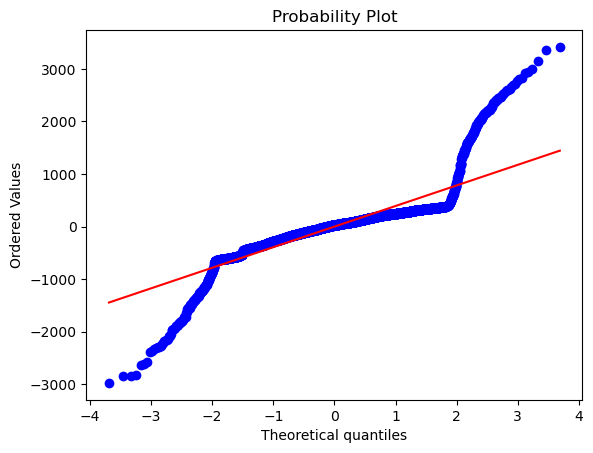

In [194]:
# Plot q-q plot of residuals
import pylab

import scipy.stats as stats

stats.probplot(residuals, dist = "norm", plot = pylab)

plt.show()

**Observations:**
- residuals are normally distributed round mena
- q-q plot shows linear relation

### **Apply cross validation to improve the model and evaluate it using different evaluation metrics**

Let's check the performance of the model using cross-validation technique from the scikit-learn library and see if the performance on the train and the test data is comparable to what we are getting after cross-validating the data. 

In [195]:
# Import the required function

from sklearn.model_selection import cross_val_score

# Build the regression model and cross-validate
linearregression = LinearRegression()                                    

cv_Score11 = cross_val_score(linearregression, X_train1, y_train, cv = 10)
cv_Score12 = cross_val_score(linearregression, X_train1, y_train, cv = 10, 
                             scoring = 'neg_mean_squared_error')                                  


print("RSquared: %0.3f (+/- %0.3f)" % (cv_Score11.mean(), cv_Score11.std() * 2))
print("Mean Squared Error: %0.3f (+/- %0.3f)" % (-1*cv_Score12.mean(), cv_Score12.std() * 2))



RSquared: 0.823 (+/- 0.045)
Mean Squared Error: 200733.821 (+/- 64163.419)


In [197]:
# These test predictions will be on a log scale
test_predictions = ols_res_2.predict(X_test1)

# We are converting the log scale predictions to its original scale
test_predictions_inverse_transformed = np.exp(test_predictions)

test_predictions_inverse_transformed
ols_res_2.

7441    inf
6355    inf
1271    inf
3511    inf
1821    inf
       ... 
8518    inf
1949    inf
7551    inf
1476    inf
8323    inf
Length: 2629, dtype: float64

**Observation:**
const                               170.3123     42.322      4.024      0.000      87.347     253.278
Product_Weight                      135.0292      3.436     39.303      0.000     128.294     141.764
Product_MRP                          12.8734      0.254     50.719      0.000      12.376      13.371
Product_Sugar_Content_No Sugar       16.0785     12.324      1.305      0.192      -8.081      40.238
Product_Sugar_Content_Regular        31.1834     13.282      2.348      0.019       5.147      57.220
Store_Size_Medium                   391.2499     26.412     14.813      0.000     339.472     443.028
Store_Size_Small                   -384.2582      5.702    -67.394      0.000    -395.436    -373.081
Store_Location_City_Type_Tier 2    -309.3023      8.800    -35.146      0.000    -326.554    -292.050
Store_Location_City_Type_Tier 3    -384.2582      5.702    -67.394      0.000    -395.436    -373.081
Store_Type_Food Mart               -384.2582      5.702    -67.394      0.000    -395.436    -373.081
Store_Type_Supermarket Type1        163.3206     17.675      9.240      0.000     128.670     197.971
Store_Type_Supermarket Type2       -472.6228     17.158    -27.545      0.000    -506.260    -438.986
Product_Id_char_FD                    0.5288     21.937      0.024      0.981     -42.474      43.532
Product_Id_char_NC                   16.0785     12.324      1.305      0.192      -8.081      40.238
Product_Type_Category_Perishables     7.8513     13.233      0.593      0.553     -18.091      33.793

## **Actionable Insights and Business Recommendations**

___________________________________________________________________________